# GWP 3

Importing necessary packages like yahoo Finance, Skimpy, Pnada, Numpy, Matplotlib etc.

In [3]:
%pip install yfinance 
%pip install skimpy 
%pip install optuna 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/380.1 kB ? eta -:--:--
   --- ------------------------------------ 30.7/380.1 kB ? eta -:--:--
   ----------- ---------------------------- 112.6/380.1 kB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 112.6/380.1 kB 1.3 MB/s eta 0:00:01
   ------------------------ --------------- 235.5/380.1 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 245.8/380.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 380.1/380.1 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import optuna
import yfinance as yf
from skimpy import skim
import matplotlib.pyplot as plt
from numpy.random import seed
import seaborn as sns
import scipy.cluster.hierarchy as sch


## Step 3

### a. Daily data for (JPM, WFC, BAC, C, GS, USB, MS, KEY, PNC, COF, AXP, PRU, SCHW, BBT, STI) from Sep 2008 - Oct 2008

In [5]:
#function to get data

def get_daily_return(tickers, start_date, end_date):

  df = pd.DataFrame()

  for ticks in tickers:
    t_data = yf.download(ticks, start=start_date, end=end_date)
    df[ticks] = t_data['Adj Close']

  df.index = pd.to_datetime(df.index, format= '%Y%m%d')

  return df


In [6]:
tickers = ['JPM', 'WFC', 'BAC', 'C', 'GS', 'USB', 'MS', 'KEY', 'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'BBW', 'HSBC'] # Financial tickers
start_date = "2008-09-01"
end_date = "2008-10-31"

In [7]:
df = get_daily_return(tickers, start_date, end_date)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += 

In [8]:
df

,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,AXP,PRU,SCHW,BBW,HSBC
Date,,,,,,,,,,,,,,,
2008-09-02,26.021473,20.452139,24.999901,144.855957,126.757698,20.446831,29.297445,7.949236,47.672024,34.334393,31.480007,43.096970,19.683136,6.303370,34.222141
2008-09-03,26.501989,20.321083,25.757948,148.646057,128.513519,20.813190,29.914612,8.018639,48.113441,34.900005,31.696934,44.243397,19.707552,6.538442,34.261391
2008-09-04,25.300703,19.442966,23.913624,138.716064,123.368652,19.992033,28.616442,7.520235,47.224110,33.119091,30.023388,42.829830,19.178440,6.564560,33.136341
2008-09-05,26.428587,20.445585,25.187450,144.552719,125.162834,20.680548,29.340015,8.182672,48.223766,34.173897,30.526999,43.820438,19.609882,6.521028,33.097111
2008-09-08,27.729990,21.992109,27.141172,154.027908,130.138977,21.438532,30.694939,8.668459,49.840084,37.246559,31.394770,47.259731,20.529724,6.834456,34.496861
2008-09-09,26.341822,20.425928,25.414087,143.112518,123.959053,20.251017,28.659018,8.296233,47.289032,34.777706,29.628242,44.410351,19.121456,6.634211,34.130577
2008-09-10,26.295105,20.773243,25.320305,141.596542,120.830757,20.118364,27.609119,7.924005,45.997253,34.838860,29.566257,44.399220,19.365669,7.017289,34.531757
2008-09-11,27.796730,22.182148,25.836100,141.065872,120.401352,21.249039,27.460146,8.075419,47.399372,35.419758,30.031130,45.779396,19.943624,6.965050,34.195984
2008-09-12,27.476385,22.470486,26.367512,136.138840,118.239113,21.369055,26.410271,8.435027,47.366905,35.114033,30.178347,44.849998,19.512186,6.843162,34.374763


In [9]:
# Summary Statistics
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 43     │ │ float64     │ 15    │                                                          │
│ │ Number of columns │ 15     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ JPM            │   0 │      0 │   27.18 │   2.435 │   22.87 │   25.67 │   26.9 │  27.76 │  33.53 │ ▂▅▇▁▁▁  │  │
│ │ WFC            │   0 │      0 │   21.62 │   1.628 │   17.86 │   20.45 │  21.79 │  22.46 │  26.08 │ ▁▇▇▇▂▁  │  │
│ │ BAC            │   0 │      0 │   22.43 │   4.367 │   15.34 │   18.08 │  23.64 │  25.93 │   29.8 │ ▃▅▂▂▇▂  │  │
│ │ C              │   0 │      0 │   128.3 │   22.32 │   88.91 │   108.3 │    132 │  144.7 │  174.3 │ ▅▅▃▇▅▁  │  │
│ │ GS             │   0 │      0 │   96.88 │   17.18 │   68.09 │   86.41 │  94.23 │  103.9 │  130.1 │ ▆▇▇▆▁▆  │  │
│ │ USB            │   0 │      0 │   20.69 │   1.593 │   17.97 │   19.62 │  20.45 │   21.8 │     24 │ ▆▇▇▅▃▅  │  │
│ │ MS             │   0 │      0 │   17.75 │   6.531 │   6.867 │      13 │  16.32 │  20.11 │  30.69 │ ▂▇▇▃▁▅  │  │
│ │ KEY            │   0 │      0 │   7.394 │   1.219 │    4.05 │   6.612 │  7.665 │  8.287 │  9.388 │ ▁ ▅▃▇▃  │  │
│ │ PNC            │   0 │      0 │   45.05 │    4.36 │   36.45 │   41.24 │  46.53 │  48.18 │  52.72 │ ▅▃▃▇▇▃  │  │
│ │ COF            │   0 │      0 │   33.51 │   4.825 │   25.54 │   29.36 │  34.17 │   36.5 │  42.84 │ ▆▇▅▇▃▅  │  │
│ │ AXP            │   0 │      0 │   24.87 │   4.925 │   17.97 │   19.73 │  25.22 │   29.6 │   31.7 │ ▇▃▁▂▅▇  │  │
│ │ PRU            │   0 │      0 │   33.15 │   10.72 │   16.07 │   22.93 │  36.03 │  43.19 │     48 │ ▆▃▂▂▅▇  │  │
│ │ SCHW           │   0 │      0 │    17.7 │   2.216 │   12.64 │   16.18 │  18.31 │  19.48 │  21.16 │ ▂▃▃▅▇▅  │  │
│ │ BBW            │   0 │      0 │   5.585 │   1.191 │   3.439 │   4.301 │  6.121 │  6.599 │  7.244 │ ▃▇▃▁▇▇  │  │
│ │ HSBC           │   0 │      0 │   32.22 │   3.427 │   22.68 │   30.34 │  33.34 │  34.59 │  35.99 │ ▁▁▁▃▃▇  │  │
│ └────────────────┴─────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### b. Daily data for (KR, PFE, XOM, WMT, DAL, CSCO, HCP, EQIX, DUK, NFLX, GE, APA, F, REGN, CMS) from Sep 2008 - Oct 2008

In [10]:
tickers2 = ['KR', 'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'VRSN', 'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS'] # Non-financial instituions
start_date = "2008-09-01"
end_date = "2008-10-31"

In [11]:
df2 = get_daily_return(tickers2, start_date, end_date)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += 

In [12]:
df2

,KR,PFE,XOM,WMT,DAL,CSCO,VRSN,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
Date,,,,,,,,,,,,,,,
2008-09-02,10.399013,9.623149,43.370876,14.096432,8.042812,15.969234,26.654852,62.147255,25.346951,4.405714,92.001938,82.546875,2.525399,20.580000,7.950078
2008-09-03,10.395274,9.638206,43.763519,14.129515,7.990184,15.673383,26.366140,61.533085,25.025352,4.415714,92.130920,83.431816,2.558997,21.799999,7.856614
2008-09-04,10.193275,9.372150,42.708988,14.127151,7.858625,14.980825,23.691315,59.498623,25.273851,4.267143,89.325417,85.411255,2.458205,20.379999,7.868298
2008-09-05,10.051131,9.291831,42.417290,14.354017,7.727063,14.967373,24.345161,59.490929,25.303091,4.237143,89.905830,86.497986,2.469404,19.070000,7.792358
2008-09-08,10.211976,9.608089,43.062351,14.651780,7.534106,15.713731,24.098907,59.506290,26.121675,4.307143,93.807777,85.209412,2.547798,18.900000,8.031854
2008-09-09,10.455118,9.156295,41.093502,14.446182,7.218356,15.444770,23.215790,56.872997,26.457876,4.105714,90.679787,78.052368,2.463805,18.520000,7.839089
2008-09-10,10.466345,9.136221,42.209743,14.656502,6.902609,15.458220,22.731775,55.790516,26.121675,4.107143,90.583023,81.786133,2.503001,19.430000,7.915030
2008-09-11,10.548638,9.231594,42.383640,14.928273,7.095567,15.498564,23.317690,58.416138,26.633301,4.118571,90.808784,84.619469,2.620593,20.580000,7.938392
2008-09-12,10.432680,9.347051,43.471832,14.748668,7.130650,15.774245,22.986521,59.061039,26.750240,4.207143,86.261894,87.243195,2.749382,20.709999,8.055221


In [13]:
# Summary Statistics
skim(df2)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 43     │ │ float64     │ 15    │                                                          │
│ │ Number of columns │ 15     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ KR             │   0 │      0 │   9.974 │   0.4005 │   8.895 │  9.823 │  10.04 │  10.28 │  10.55 │ ▁▂▃▇▇▇  │  │
│ │ PFE            │   0 │      0 │   8.928 │   0.4892 │     7.6 │  8.599 │  9.031 │  9.329 │  9.638 │ ▁▁▆▅▇▇  │  │
│ │ XOM            │   0 │      0 │    41.7 │    2.599 │   34.97 │  40.82 │  42.38 │  43.52 │  45.25 │ ▁▁▂▂▇▅  │  │
│ │ WMT            │   0 │      0 │   13.55 │   0.9095 │   11.74 │  12.87 │  13.91 │  14.18 │  14.93 │ ▃▂▅▂▇▅  │  │
│ │ DAL            │   0 │      0 │   7.205 │   0.9734 │   4.947 │  6.806 │  7.157 │  7.876 │  8.718 │ ▂▁▃▇▇▅  │  │
│ │ CSCO           │   0 │      0 │   13.86 │    1.754 │   10.82 │  12.03 │  14.65 │  15.39 │  16.33 │ ▅▆▂▂▇▇  │  │
│ │ VRSN           │   0 │      0 │   20.91 │    2.455 │   15.64 │  19.57 │  21.11 │  22.59 │  26.65 │ ▂▅▇▇▅▁  │  │
│ │ EQIX           │   0 │      0 │   51.05 │    7.706 │   39.67 │   43.7 │  50.45 │  58.52 │  64.96 │ ▇▅▃▃▇▃  │  │
│ │ DUK            │   0 │      0 │   24.82 │    1.573 │   21.09 │  23.82 │   25.3 │  26.11 │  27.17 │ ▁▅▂▃▇▅  │  │
│ │ NFLX           │   0 │      0 │    3.83 │   0.6191 │   2.563 │  3.266 │  4.106 │  4.356 │   4.71 │ ▁▆▃▁▇▇  │  │
│ │ GE             │   0 │      0 │   75.38 │    11.12 │   57.94 │  65.41 │  75.43 │  84.69 │  93.81 │ ▇▇▅▅▅▇  │  │
│ │ APA            │   0 │      0 │   72.28 │    13.68 │   50.06 │  60.07 │  76.75 │  84.91 │  94.04 │ ▆▆▂▂▇▅  │  │
│ │ F              │   0 │      0 │   2.052 │   0.6999 │   1.114 │  1.282 │  2.436 │  2.674 │  2.962 │ ▇▁ ▁▆▆  │  │
│ │ REGN           │   0 │      0 │   19.78 │    1.931 │   15.46 │  18.72 │  19.59 │  21.23 │  23.07 │ ▁▃▇▅▇▃  │  │
│ │ CMS            │   0 │      0 │   6.814 │   0.8993 │    5.31 │  5.929 │  7.074 │  7.541 │  8.055 │ ▃▇▁▃▇▇  │  │
│ └────────────────┴─────┴────────┴─────────┴──────────┴─────────┴────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### c. Combining both df and df2 dataset together and calculating daily returns

In [14]:
combined_df = pd.concat([df, df2], axis=1) # combining both the data frames
combined_df.index = pd.to_datetime(combined_df.index) # formating the data time index
combined_df = combined_df.sort_index() # sorting the index in chronological order

In [15]:
# Computing daily returns of the data as well as dropping nan values
main_df_daily_returns = combined_df.pct_change().dropna()

In [16]:
main_df_daily_returns

,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,...,CSCO,VRSN,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-03,0.018466,-0.006408,0.030322,0.026165,0.013852,0.017918,0.021066,0.008731,0.009259,0.016474,...,-0.018526,-0.010831,-0.009882,-0.012688,0.002270,0.001402,0.010720,0.013304,0.059281,-0.011756
2008-09-04,-0.045328,-0.043212,-0.071602,-0.066803,-0.040034,-0.039454,-0.043396,-0.062156,-0.018484,-0.051029,...,-0.044187,-0.101449,-0.033063,0.009930,-0.033646,-0.030451,0.023725,-0.039387,-0.065138,0.001487
2008-09-05,0.044579,0.051567,0.053268,0.042076,0.014543,0.034439,0.025285,0.088087,0.021168,0.031849,...,-0.000898,0.027599,-0.000129,0.001157,-0.007030,0.006498,0.012724,0.004556,-0.064279,-0.009651
2008-09-08,0.049242,0.075641,0.077567,0.065548,0.039757,0.036652,0.046180,0.059368,0.033517,0.089913,...,0.049866,-0.010115,0.000258,0.032351,0.016521,0.043400,-0.014897,0.031746,-0.008915,0.030735
2008-09-09,-0.050060,-0.071216,-0.063633,-0.070866,-0.047487,-0.055392,-0.066328,-0.042940,-0.051185,-0.066284,...,-0.017116,-0.036646,-0.044252,0.012871,-0.046766,-0.033345,-0.083994,-0.032967,-0.020106,-0.024000
2008-09-10,-0.001773,0.017004,-0.003690,-0.010593,-0.025237,-0.006550,-0.036634,-0.044867,-0.027317,0.001758,...,0.000871,-0.020849,-0.019033,-0.012707,0.000348,-0.001067,0.047837,0.015909,0.049136,0.009687
2008-09-11,0.057107,0.067823,0.020371,-0.003748,-0.003554,0.056201,-0.005396,0.019108,0.030483,0.016674,...,0.002610,0.025775,0.047062,0.019586,0.002782,0.002492,0.034643,0.046980,0.059187,0.002952
2008-09-12,-0.011525,0.012999,0.020569,-0.034927,-0.017959,0.005648,-0.038233,0.044531,-0.000685,-0.008631,...,0.017788,-0.014202,0.011040,0.004391,0.021506,-0.050071,0.031006,0.049145,0.006317,0.014717
2008-09-15,-0.101288,-0.095946,-0.213100,-0.151448,-0.121328,-0.023943,-0.135375,-0.073299,-0.034946,-0.026992,...,-0.046036,-0.071297,-0.060835,-0.024044,-0.045501,-0.080374,-0.071181,-0.034623,-0.012554,-0.039884


In [17]:
skim(main_df_daily_returns) # summary statistics of daily returns of each stocks

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 42     │ │ float64     │ 30    │                                                          │
│ │ Number of columns │ 30     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃    ┃      ┃           ┃         ┃          ┃          ┃           ┃         ┃         ┃        ┃  │
│ ┃ me        ┃ NA ┃ NA % ┃ mean      ┃ sd      ┃ p0       ┃ p25      ┃ p50       ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ JPM       │  0 │    0 │  0.002304 │ 0.07825 │  -0.1501 │ -0.05021 │ -0.001627 │ 0.05311 │  0.1675 │ ▃▆▇▇▃▃ │  │
│ │ WFC       │  0 │    0 │  0.002759 │ 0.06838 │  -0.1458 │ -0.04173 │ -0.003482 │  0.0493 │  0.1287 │ ▂▃▆▇▅▃ │  │
│ │ BAC       │  0 │    0 │ -0.003077 │ 0.09945 │  -0.2623 │ -0.06507 │ -0.005298 │ 0.06069 │  0.2256 │ ▁▂▇▇▅▂ │  │
│ │ C         │  0 │    0 │ -0.004175 │ 0.09679 │  -0.1844 │ -0.06328 │  -0.02104 │ 0.03696 │  0.2402 │ ▃▇▇▃▂▂ │  │
│ │ GS        │  0 │    0 │  -0.01109 │ 0.07877 │  -0.1392 │ -0.06449 │  -0.01817 │ 0.01869 │    0.25 │ ▅▇▇▂ ▁ │  │
│ │ USB       │  0 │    0 │ -0.001354 │ 0.04824 │  -0.0953 │ -0.03345 │ -0.005628 │ 0.03221 │  0.1029 │ ▃▆▆▇▃▁ │  │
│ │ MS        │  0 │    0 │ -0.009401 │  0.1771 │  -0.2589 │ -0.08661 │  -0.02325 │ 0.03292 │  0.8698 │  ▃▇▁   │  │
│ │ KEY       │  0 │    0 │  0.008212 │   0.137 │  -0.3333 │ -0.04955 │  0.006848 │ 0.05737 │  0.5425 │  ▁▅▇▂  │  │
│ │ PNC       │  0 │    0 │ -0.001294 │ 0.05703 │  -0.1166 │ -0.04409 │ -0.001155 │ 0.02926 │  0.1362 │ ▃▆▇▇▁▃ │  │
│ │ COF       │  0 │    0 │  -0.00085 │ 0.07922 │  -0.1934 │ -0.05119 │  -0.01244 │ 0.03177 │  0.1653 │ ▁▁▇▆▂▂ │  │
│ │ AXP       │  0 │    0 │ -0.007992 │ 0.07009 │  -0.1759 │ -0.04902 │  -0.01166 │ 0.02796 │  0.1793 │ ▁▃▇▇▂▁ │  │
│ │ PRU       │  0 │    0 │  -0.01807 │  0.1049 │  -0.2315 │ -0.09321 │  -0.03141 │ 0.02683 │  0.3825 │  ▁▇▅▃  │  │
│ │ SCHW      │  0 │    0 │ -0.003709 │  0.0739 │  -0.1204 │ -0.05498 │  -0.01426 │ 0.04294 │  0.1965 │ ▅▇▇▅▂▁ │  │
│ │ BBW       │  0 │    0 │ -0.007584 │ 0.05899 │  -0.1487 │ -0.04037 │  -0.01476 │ 0.03756 │  0.1258 │ ▂▂▇▃▅▂ │  │
│ │ HSBC      │  0 │    0 │ -0.004854 │ 0.04563 │  -0.1431 │ -0.03223 │ -0.000551 │ 0.01999 │ 0.09423 │ ▁▁▇▇▆▂ │  │
│ │           │    │      │           │         │          │          │         4 │         │         │        │  │
│ │ KR        │  0 │    0 │ 0.0001493 │ 0.02994 │ -0.04661 │ -0.02108 │ -0.001667 │ 0.01909 │ 0.07044 │ ▇▇▇▃▃▂ │  │
│ │ PFE       │  0 │    0 │ -0.000960 │  0.0386 │ -0.08523 │ -0.03032 │ -0.002675 │ 0.02659 │  0.1017 │ ▂▇▇▇▂▁ │  │
│ │           │    │      │         8 │         │          │          │           │         │         │        │  │
│ │ XOM       │  0 │    0 │  0.001122 │ 0.06158 │  -0.1395 │ -0.02002 │ -0.001527 │ 0.02524 │  0.1719 │ ▁▂▇▃▁▁ │  │
│ │ WMT       │  0 │    0 │ -0.001445 │ 0.03517 │ -0.08064 │ -0.01518 │ -0.004374 │ 0.01399 │  0.1107 │ ▁▂▇▂ ▁ │  │
│ │ DAL       │  0 │    0 │  0.004547 │  0.0866 │  -0.21

## Step 4

In [18]:
# Combined data set correlation matrix

main_df_daily_returns.corr()

,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,...,CSCO,VRSN,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
JPM,1.000000,0.788109,0.840628,0.800970,0.457663,0.874268,0.305244,0.516241,0.831851,0.719848,...,0.682542,0.646224,0.637276,0.343693,0.529818,0.781706,0.494771,0.486593,0.558347,0.567142
WFC,0.788109,1.000000,0.830237,0.736664,0.507067,0.843001,0.429166,0.695693,0.745077,0.805571,...,0.648628,0.555866,0.564220,0.390882,0.378512,0.689120,0.529242,0.659980,0.541779,0.482437
BAC,0.840628,0.830237,1.000000,0.904035,0.661775,0.795647,0.539035,0.753169,0.653550,0.799047,...,0.710793,0.600995,0.628118,0.365082,0.538078,0.703996,0.579602,0.623456,0.541941,0.637233
C,0.800970,0.736664,0.904035,1.000000,0.623448,0.735773,0.550131,0.742449,0.616419,0.790940,...,0.636118,0.607640,0.607205,0.365734,0.474862,0.695935,0.514994,0.532483,0.518865,0.591420
GS,0.457663,0.507067,0.661775,0.623448,1.000000,0.395572,0.814933,0.595029,0.193896,0.487570,...,0.600028,0.608063,0.587594,0.404719,0.226109,0.309902,0.597170,0.500631,0.453066,0.594520
USB,0.874268,0.843001,0.795647,0.735773,0.395572,1.000000,0.359950,0.589450,0.864232,0.821942,...,0.691788,0.634401,0.629264,0.420872,0.459024,0.720044,0.552583,0.646820,0.546531,0.575619
MS,0.305244,0.429166,0.539035,0.550131,0.814933,0.359950,1.000000,0.531888,0.168171,0.492567,...,0.618104,0.571970,0.577916,0.572370,0.296235,0.246946,0.666600,0.590733,0.533808,0.637428
KEY,0.516241,0.695693,0.753169,0.742449,0.595029,0.589450,0.531888,1.000000,0.424825,0.730262,...,0.459448,0.400375,0.373144,0.218166,0.167087,0.494955,0.407391,0.564468,0.405321,0.456178
PNC,0.831851,0.745077,0.653550,0.616419,0.193896,0.864232,0.168171,0.424825,1.000000,0.669604,...,0.584305,0.524276,0.536751,0.402257,0.437080,0.738852,0.411806,0.511091,0.470773,0.435344
COF,0.719848,0.805571,0.799047,0.790940,0.487570,0.821942,0.492567,0.730262,0.669604,1.000000,...,0.743121,0.602336,0.638252,0.435241,0.499264,0.700032,0.608167,0.695950,0.609718,0.642972


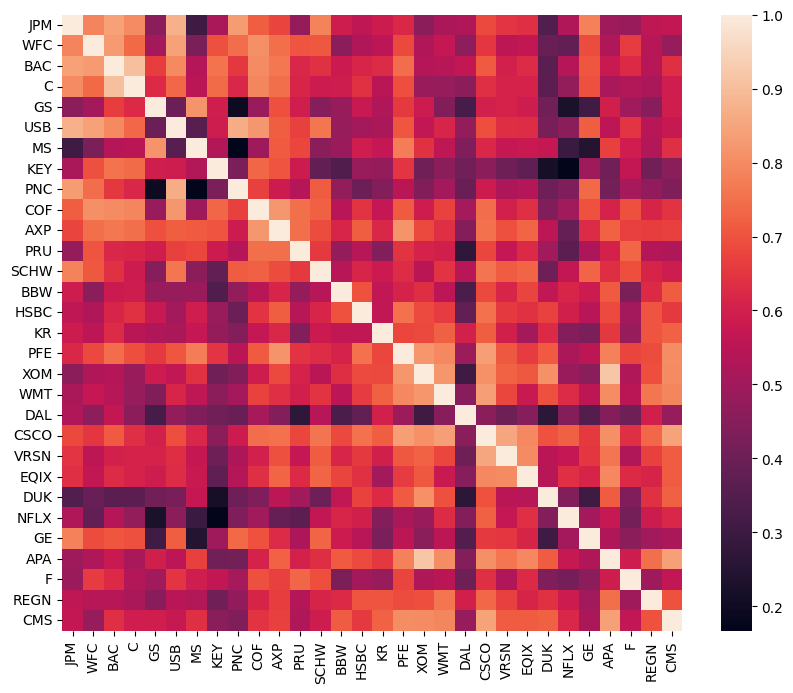

In [19]:
# Combined data correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(main_df_daily_returns.corr())
plt.show()

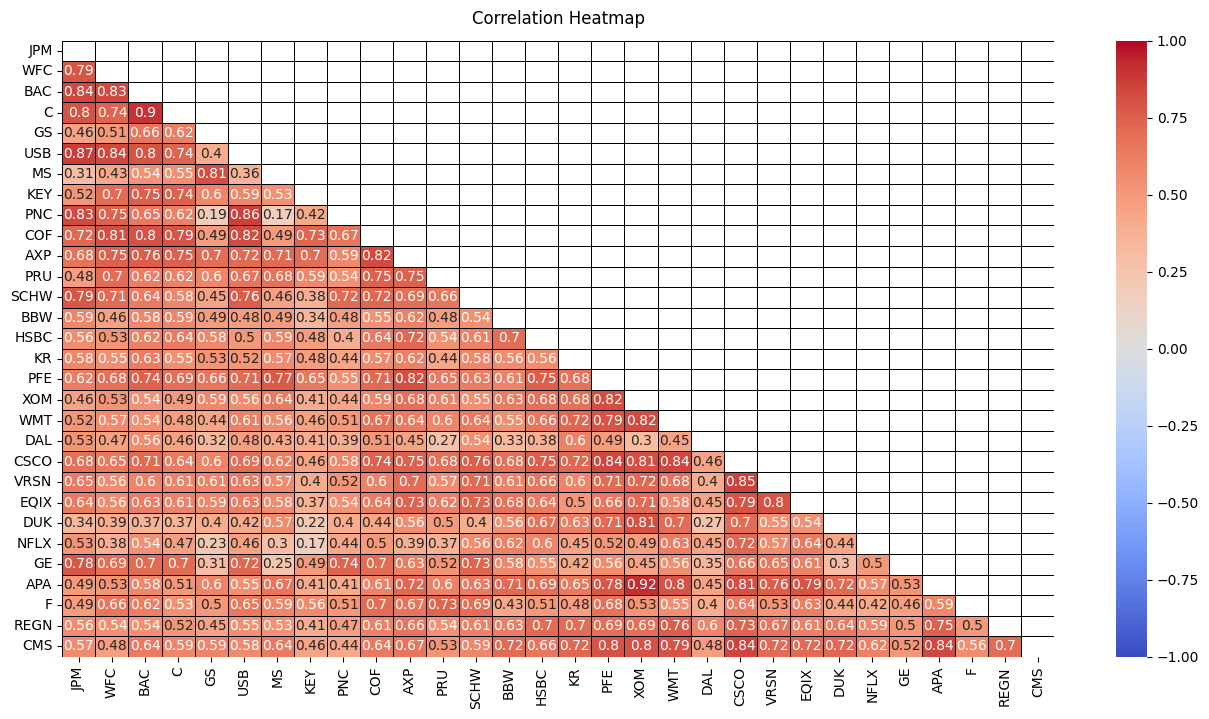

In [20]:
# Combined data correlation heatmap

plt.figure(figsize=(16, 8))
mask = np.triu(np.ones_like(main_df_daily_returns.corr()))
heatmap = sns.heatmap(main_df_daily_returns.corr(), mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<Figure size 1000x1600 with 0 Axes>

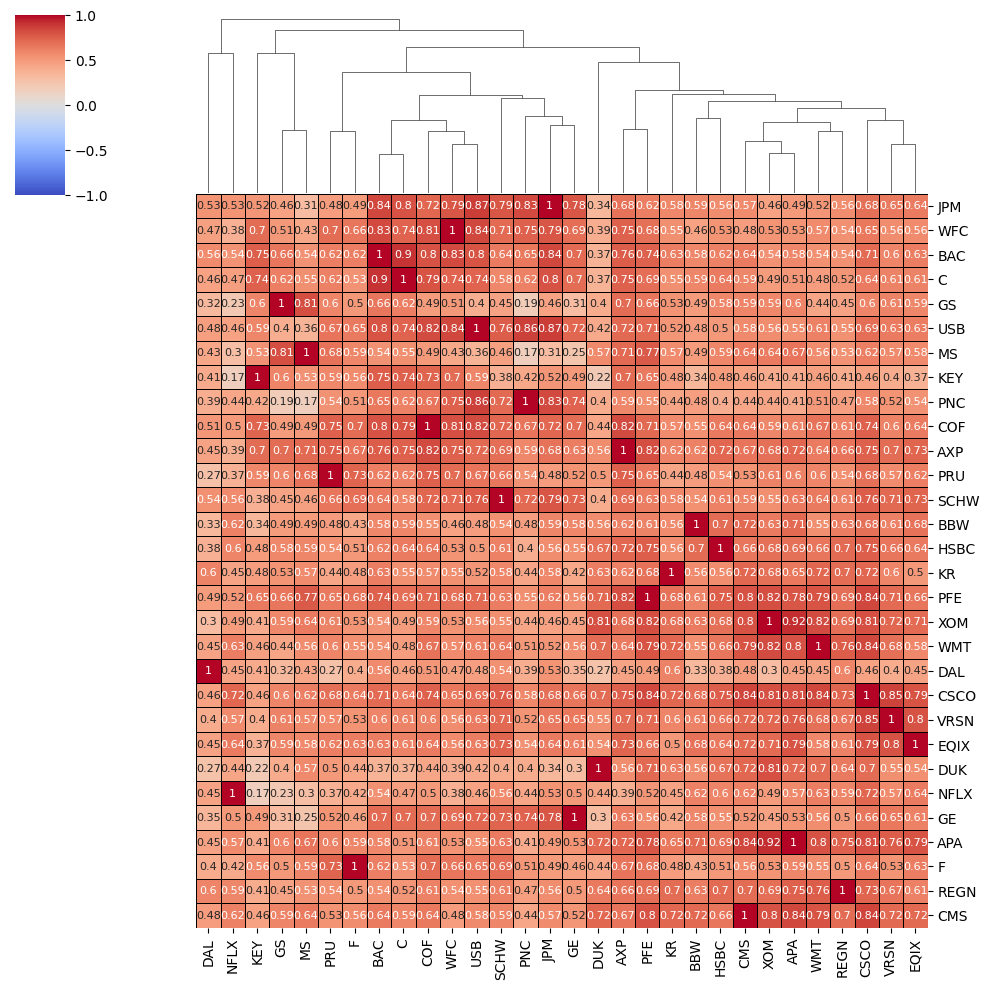

In [21]:
# Combined data correlation cluster analysis

plt.figure(figsize=(10, 16))
mask = np.triu(np.ones_like(main_df_daily_returns.corr()))
cluster = sns.clustermap(main_df_daily_returns.corr(), row_cluster=False, annot=True,annot_kws={'size': 8}, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

In [22]:
# Using clustering techiniques to find a ser of higglky correlated portfolio for stock picking

from scipy.cluster.hierarchy import linkage, fcluster

# Performing hierarchical clustering
Z = linkage(main_df_daily_returns.corr(), method='ward')

# Setting the number of clusters or using a threshold to form flat clusters
max_d = 0.8
clusters = fcluster(Z, max_d, criterion='distance')

# Creating a DataFrame to store stock symbols and their respective cluster
clustered_stocks = pd.DataFrame({'Stock': main_df_daily_returns.corr().index, 'Cluster': clusters})

# Sorting the DataFrame by cluster
clustered_stocks = clustered_stocks.sort_values(by='Cluster').reset_index(drop=True)
print(clustered_stocks)


   Stock  Cluster
0    WFC        1
1    BAC        1
2      C        1
3    USB        1
4    COF        1
5    JPM        2
6     GE        2
7    PNC        2
8   SCHW        3
9    AXP        4
10   PFE        4
11  EQIX        5
12  VRSN        5
13  CSCO        5
14  HSBC        6
15   BBW        6
16   XOM        7
17   APA        7
18   CMS        7
19    KR        8
20   WMT        8
21  REGN        8
22   DUK        9
23   DAL       10
24  NFLX       11
25    MS       12
26    GS       12
27   PRU       13
28     F       13
29   KEY       14


In [23]:
# Grouping stocks by their cluster
grouped_stocks = clustered_stocks.groupby('Cluster')

#Printing stocks in each cluster
for cluster, stocks in grouped_stocks:
    print(f'Cluster {cluster}: {stocks["Stock"].tolist()}')

# filtering stocks by a specific cluster
cluster_1_stocks = clustered_stocks[clustered_stocks['Cluster'] == 1]['Stock'].tolist()
print(f'Stocks in Cluster 1: {cluster_1_stocks}')


Cluster 1: ['WFC', 'BAC', 'C', 'USB', 'COF']
Cluster 2: ['JPM', 'GE', 'PNC']
Cluster 3: ['SCHW']
Cluster 4: ['AXP', 'PFE']
Cluster 5: ['EQIX', 'VRSN', 'CSCO']
Cluster 6: ['HSBC', 'BBW']
Cluster 7: ['XOM', 'APA', 'CMS']
Cluster 8: ['KR', 'WMT', 'REGN']
Cluster 9: ['DUK']
Cluster 10: ['DAL']
Cluster 11: ['NFLX']
Cluster 12: ['MS', 'GS']
Cluster 13: ['PRU', 'F']
Cluster 14: ['KEY']
Stocks in Cluster 1: ['WFC', 'BAC', 'C', 'USB', 'COF']


In [24]:
# Building a new dataframe for slected cluster for further analysis
stock_returns = pd.DataFrame(main_df_daily_returns, index=main_df_daily_returns.index, columns=tickers)

# Stocks in Cluster 1
cluster_1_stocks = ['WFC', 'BAC', 'C', 'USB', 'COF']

# Extracting data for Cluster 1 stocks
cluster_1_data = stock_returns[cluster_1_stocks]

# Displaying the data
print(cluster_1_data)

                 WFC       BAC         C       USB       COF
Date                                                        
2008-09-03 -0.006408  0.030322  0.026165  0.017918  0.016474
2008-09-04 -0.043212 -0.071602 -0.066803 -0.039454 -0.051029
2008-09-05  0.051567  0.053268  0.042076  0.034439  0.031849
2008-09-08  0.075641  0.077567  0.065548  0.036652  0.089913
2008-09-09 -0.071216 -0.063633 -0.070866 -0.055392 -0.066284
2008-09-10  0.017004 -0.003690 -0.010593 -0.006550  0.001758
2008-09-11  0.067823  0.020371 -0.003748  0.056201  0.016674
2008-09-12  0.012999  0.020569 -0.034927  0.005648 -0.008631
2008-09-15 -0.095946 -0.213100 -0.151448 -0.023943 -0.026992
2008-09-16  0.126774  0.112994  0.033465  0.068140  0.097092
2008-09-17 -0.042943 -0.079526 -0.109207 -0.054721 -0.055057
2008-09-18  0.106790  0.124264  0.186743  0.102880  0.165301
2008-09-19  0.075676  0.225638  0.240241  0.033180  0.037963
2008-09-22 -0.116081 -0.088847 -0.030993 -0.078705 -0.028546
2008-09-23 -0.028710 -0.

In [25]:
# Converting the data and data index to numpy format

Pdata_new = cluster_1_data.to_numpy()
Pdata_new_dates = cluster_1_data.index.to_numpy()

## Step 6

Upper-Confidence Bound (UCB) multi-armed bandit implementation

In [26]:
# Function to choose an action based on Q-values and epsilon-greedy strategy
def optimal_action(qvalue, eps):

  nactions = qvalue.shape[0]

  # Explore with probability eps
  if np.random.rand() <= eps:

    return np.random.choice(nactions)

  else:
    # Exploit: choose action with highest Q-value
    max_value = np.max(qvalue)
    best_actions = np.where(qvalue == max_value)[0]
    return np.random.choice(best_actions)


In [27]:
# Function to update Q-values based on the observed reward
def reward_update(action, reward, qvalue_old, alpha):

  qvalue_new = qvalue_old.copy()

  # Update Q-value for the chosen action using the learning rate alpha
  qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

  return qvalue_new

In [28]:
# Main function to run the UCB bandit algorithm

def run_ucb_bandit_algorithm(Pdata_new, NK, EPSILON, ALPHA, NEPISODES, HOLD, UCB_WEIGHT=0.0):
    TMAX = Pdata_new.shape[0] - HOLD
    seed(1234)
    reward_avg = np.zeros((TMAX))
    optimal_avg = np.zeros((TMAX))
    reward_queue = np.zeros((HOLD, 2))

    for _ in range(NEPISODES):
        # Initializing Q-values, upper confidence bound Q-values, and action counts
        qvalue = np.zeros((NK))
        qvalue_up = np.zeros((NK))
        nactions = np.zeros((NK))

        for tt in range(TMAX):
          # Choosing action based on upper confidence bound Q-values
            aa_opt = optimal_action(qvalue_up, EPSILON)

            # Compute reward as return over holding period
            reward_queue[HOLD - 1, 0] = (np.prod(1 + Pdata_new[tt: tt + HOLD + 1, aa_opt]) - 1)
            reward_queue[HOLD - 1, 1] = aa_opt

            # Update Q function using action chosen HOLD days before
            qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)

            # Update upper confidence bound Q-values
            qvalue_up = np.zeros((NK))
            for aa in range(NK):
                if nactions[aa] == 0:
                    qvalue_up[aa] = np.max(qvalue) + 1.0
                else:
                    qvalue_up[aa] = qvalue[aa] + UCB_WEIGHT * np.sqrt(np.log(tt + 1) / nactions[aa])

            # Shift reward queue
            reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]

            # Update average reward and optimal action frequency
            reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES

            optimal_avg[tt] += (
                aa_opt == np.argmax((np.prod(1 + Pdata_new[tt: tt + HOLD + 1, :]) - 1) / np.where(Pdata_new[tt, :] == 0, EPSILON, Pdata_new[tt, :]))
            ) / NEPISODES

    return reward_avg, optimal_avg

In [29]:
# Set parameters for the algorithm

NK = Pdata_new.shape[1] # Number of actions (presumably number of stocks or assets)
EPSILON = 0.0 # Exploration rate
ALPHA = 0.9 # Step size
NEPISODES = 1000 # Number of episodes to run
HOLD = 1 # Holding period
UCB_WEIGHT = 1.0 # Weight for upper confidence bound
TMAX = Pdata_new.shape[0] - HOLD # Maximum time steps

# Run the bandit algorithm
reward_avg, optimal_avg = run_ucb_bandit_algorithm(Pdata_new, NK, EPSILON, ALPHA, NEPISODES, HOLD, UCB_WEIGHT)

# Printing results
print("Average reward: ", reward_avg)
print("Average optimal action: ", optimal_avg)



Average reward:  [-0.0389917  -0.01440997  0.11481704 -0.00113799 -0.06560671  0.03129343
  0.03335126 -0.10380926 -0.0200396   0.01429288  0.05800157  0.27586363
  0.04613213 -0.08641325 -0.03582634 -0.00745764  0.07735413 -0.08090316
 -0.0178761   0.19220711  0.00071168 -0.10526945 -0.10876135 -0.16974507
 -0.16051214 -0.1258545  -0.0424055   0.15509602  0.20829657  0.01749314
 -0.0769818  -0.01506141 -0.00754083 -0.00781675 -0.08040668 -0.05762888
 -0.03152555 -0.05407509  0.09902398  0.0684246  -0.04098781]
Average optimal action:  [0.213 0.189 0.215 0.195 0.174 0.219 0.199 0.197 0.214 0.198 0.211 0.207
 0.195 0.205 0.198 0.206 0.207 0.208 0.181 0.221 0.184 0.219 0.2   0.212
 0.194 0.196 0.2   0.194 0.202 0.199 0.191 0.189 0.231 0.206 0.202 0.213
 0.204 0.171 0.213 0.185 0.204]


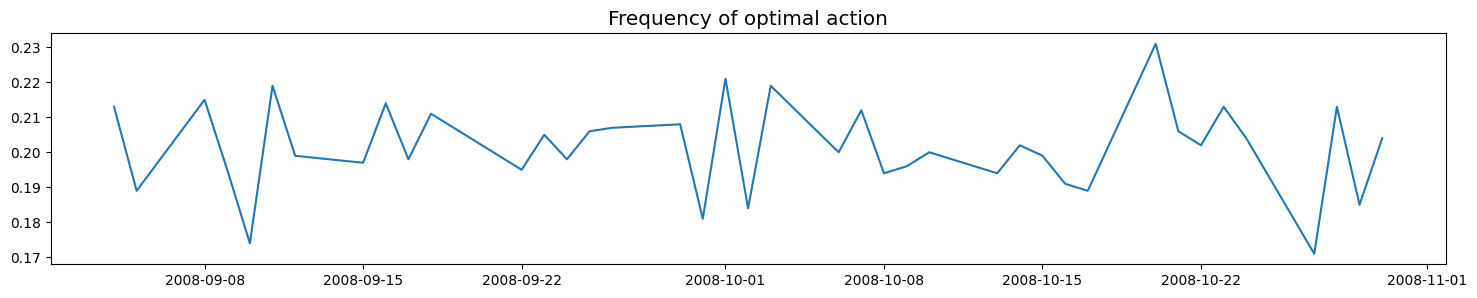

In [30]:
# Ploting the frequency of optimal action

plt.plot(Pdata_new_dates[HOLD : Pdata_new.shape[0]], optimal_avg)
plt.title("Frequency of optimal action", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

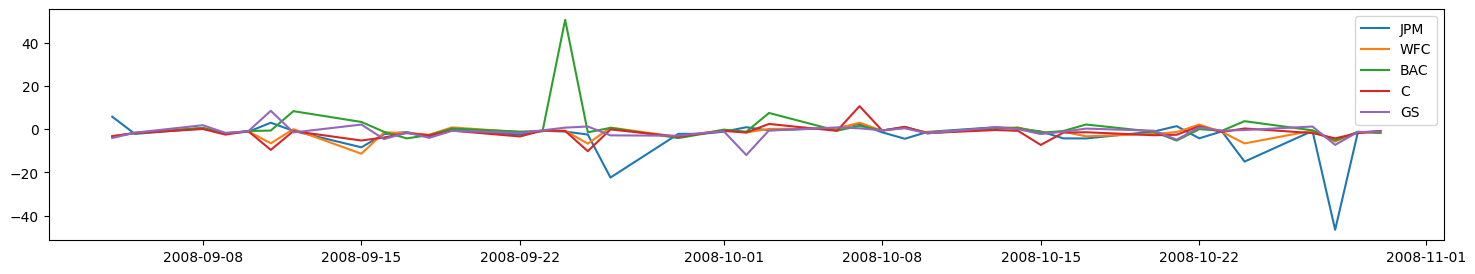

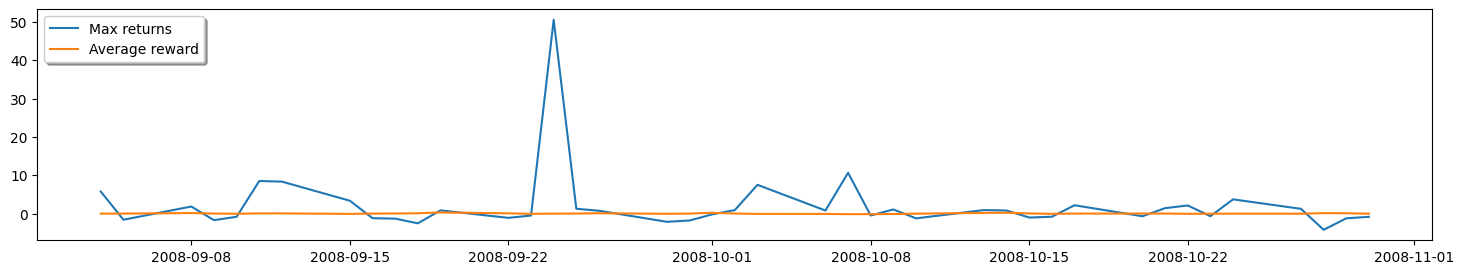

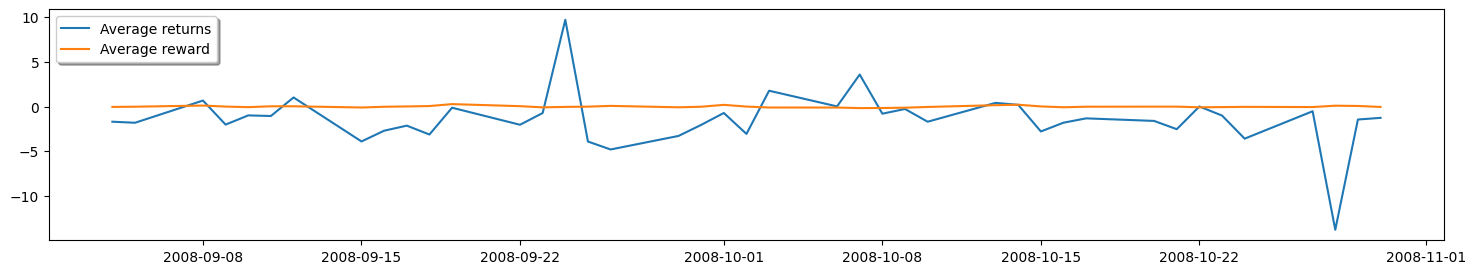

0.20148780487804893
-1.0 48.33834955050127
-0.6343947687270528 1.5045418170312135


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define a small epsilon value to handle division by zero
epsilon = 1e-10

# Replace zeros in the denominator with epsilon
denominator = np.where(Pdata_new[0:TMAX, :] == 0, epsilon, Pdata_new[0:TMAX, :])

# Plot the returns for all stocks
plt.plot(
    Pdata_new_dates[HOLD:Pdata_new.shape[0]],
    (Pdata_new[HOLD:Pdata_new.shape[0], :] - Pdata_new[0:TMAX, :]) / denominator,
)
plt.legend(tickers)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Plot the max returns and average reward
plt.plot(
    Pdata_new_dates[HOLD:Pdata_new.shape[0]],
    np.max(
        (Pdata_new[HOLD:Pdata_new.shape[0], :] - Pdata_new[0:TMAX, :]) / denominator, axis=1
    ),
    label="Max returns",
)
plt.plot(
    Pdata_new_dates[HOLD:Pdata_new.shape[0]], reward_avg, label="Average reward"
)
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Plot the average returns and average reward
plt.plot(
    Pdata_new_dates[HOLD:Pdata_new.shape[0]],
    np.mean(
        (Pdata_new[HOLD:Pdata_new.shape[0], :] - Pdata_new[0:TMAX, :]) / denominator, axis=1
    ),
    label="Average returns",
)
plt.plot(
    Pdata_new_dates[HOLD:Pdata_new.shape[0]], reward_avg, label="Average reward"
)
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))

# Average annualized return from holding the equally-weighted portfolio
annualized_return_portfolio = (
    1
    + np.mean(
        (Pdata_new[HOLD:Pdata_new.shape[0], :] - Pdata_new[0:TMAX, :]) / denominator
    )
) ** (250 / HOLD) - 1
print(
    annualized_return_portfolio,
    np.sqrt(250 / HOLD)
    * np.std(
        np.mean(
            (Pdata_new[HOLD:Pdata_new.shape[0], :] - Pdata_new[0:TMAX, :]) / denominator,
            axis=1,
        )
    ),
)

# Average annualized return from holding the Bandit portfolio
annualized_return_bandit = (1 + np.mean(reward_avg)) ** (250 / HOLD) - 1
print(
    annualized_return_bandit,
    np.sqrt(250 / HOLD) * np.std(reward_avg),
)


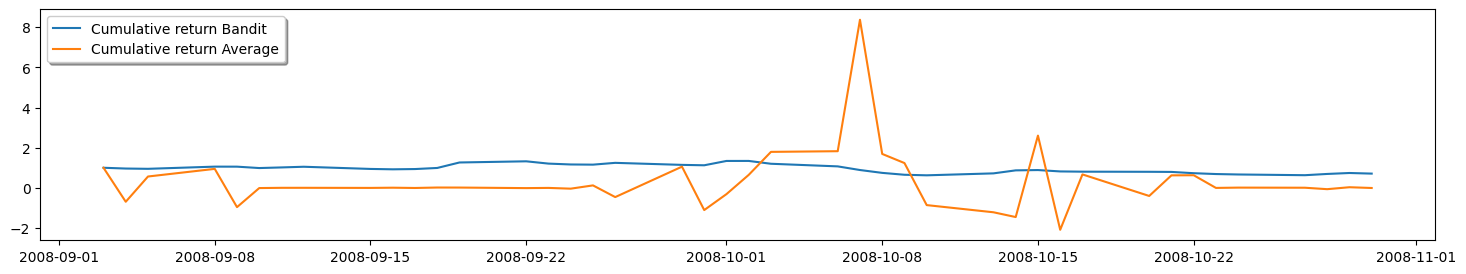

In [32]:
# Initialize array to store cumulative returns

return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1 # Initial value for Bandit strategy
return_cumulative[0, 1] = 1 # Initial value for Average strategy

# Calculate cumulative returns over time


for tt in range(1, TMAX + 1):
    # Update cumulative return for Bandit strategy
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])

     # Calculate mean return across all assets for the current time step
    rmean = np.mean(
        (Pdata_new[tt + HOLD - 1, :] - Pdata_new[tt - 1, :]) / Pdata_new[tt - 1, :]
    )

    # Update cumulative return for Average strategy
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)

# Plot cumulative returns
plt.plot(
    Pdata_new_dates[HOLD - 1 : Pdata_new.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)
plt.plot(
    Pdata_new_dates[HOLD - 1 : Pdata_new.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)

# plot display
plt.show()

## Step 8
Epsilon-greedy multi-armed bandit implementation

In [33]:
def run_eg_bandit_algorithm(Pdata_new, NK, EPSILON, ALPHA, NEPISODES, HOLD):
    TMAX = Pdata_new.shape[0] - HOLD
    seed(1234)
    reward_avg = np.zeros((TMAX))
    optimal_avg = np.zeros((TMAX))
    reward_queue = np.zeros((HOLD, 2))

    for _ in range(NEPISODES):
        qvalue = np.zeros((NK))

        for tt in range(TMAX):
            aa_opt = optimal_action(qvalue, EPSILON)

            reward_queue[HOLD - 1, 0] = (np.prod(1 + Pdata_new[tt: tt + HOLD + 1, aa_opt]) - 1)
            reward_queue[HOLD - 1, 1] = aa_opt

            qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)

            reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]

            reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
            optimal_avg[tt] += (
                aa_opt == np.argmax((np.prod(1 + Pdata_new[tt: tt + HOLD + 1, :]) - 1) / np.where(Pdata_new[tt, :] == 0, EPSILON, Pdata_new[tt, :]))
            ) / NEPISODES

    return reward_avg, optimal_avg

In [34]:
NK = Pdata_new.shape[1]
epsilon_eg = 0.9 # Exploration rate
alpha_eg = 0.9
nepisodes_eg = 1000
HOLD = 1
TMAX = Pdata_new.shape[0] - HOLD

eg_reward_avg, eg_optimal_avg = run_eg_bandit_algorithm(Pdata_new, NK, epsilon_eg, alpha_eg, nepisodes_eg, HOLD)

print("Average reward: ", eg_reward_avg)
print("Average optimal action: ", eg_optimal_avg)

Average reward:  [-0.03848069 -0.0143959   0.11520338 -0.00138586 -0.06555726  0.03233711
  0.03199256 -0.10230947 -0.01536956  0.01889847  0.06044648  0.27385877
  0.04462214 -0.08796391 -0.035502   -0.00872519  0.07604402 -0.0824233
 -0.01809631  0.19605021  0.00069938 -0.10264378 -0.10374282 -0.1736215
 -0.15709311 -0.12659862 -0.04350275  0.15130652  0.21477525  0.01908759
 -0.07670377 -0.01609228 -0.00863142 -0.00677304 -0.08157192 -0.05716402
 -0.03064944 -0.05233045  0.09690123  0.06662517 -0.04220185]
Average optimal action:  [0.194 0.205 0.208 0.19  0.188 0.198 0.21  0.187 0.243 0.157 0.186 0.185
 0.215 0.184 0.188 0.189 0.206 0.213 0.224 0.165 0.169 0.187 0.188 0.194
 0.201 0.184 0.197 0.178 0.201 0.166 0.196 0.207 0.216 0.214 0.211 0.201
 0.201 0.18  0.184 0.211 0.193]


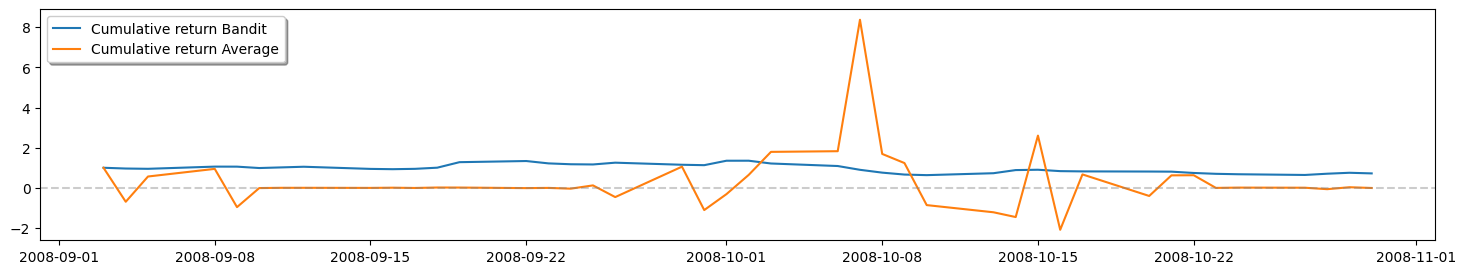

In [35]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1 # Initial value for Bandit strategy
return_cumulative[0, 1] = 1 # Initial value for Average strategy

# Calculate cumulative returns over time


for tt in range(1, TMAX + 1):
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + eg_reward_avg[tt - 1])

    rmean = np.mean(
        (Pdata_new[tt + HOLD - 1, :] - Pdata_new[tt - 1, :]) / Pdata_new[tt - 1, :]
    )

    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)

plt.plot(
    Pdata_new_dates[HOLD - 1 : Pdata_new.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)
plt.plot(
    Pdata_new_dates[HOLD - 1 : Pdata_new.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)
plt.axhline(0.0, alpha=0.4, color='grey', linestyle='--')
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

## Step 9
Comparing results of UCB vs Epsilon-greedy algorithms

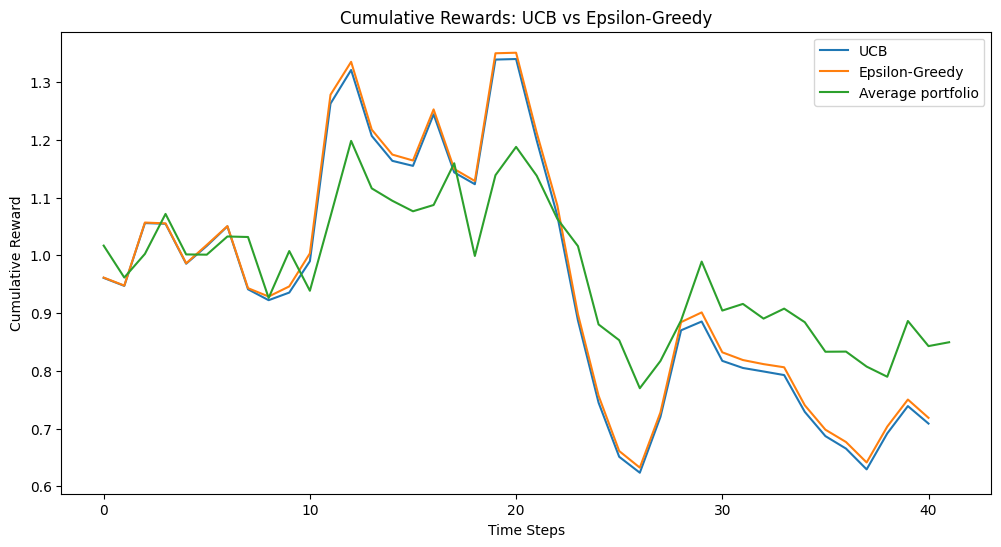

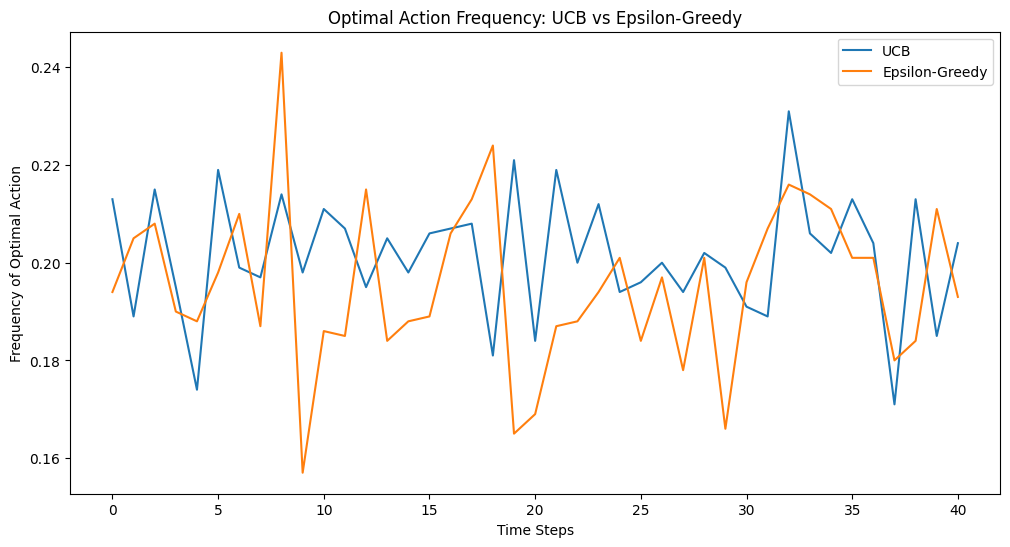

In [36]:
# Run both algorithms
ucb_reward, ucb_optimal = run_ucb_bandit_algorithm(Pdata_new, NK, EPSILON=0.0, ALPHA=ALPHA, NEPISODES=NEPISODES, HOLD=HOLD, UCB_WEIGHT=UCB_WEIGHT)
eg_reward, eg_optimal = run_eg_bandit_algorithm(Pdata_new, NK, epsilon_eg, alpha_eg, NEPISODES, HOLD)

# Plot cumulative rewards
plt.figure(figsize=(12, 6))
plt.plot(np.cumprod(1 + ucb_reward), label='UCB')
plt.plot(np.cumprod(1 + eg_reward), label='Epsilon-Greedy')
plt.plot(np.cumprod(1 + Pdata_new.mean(axis=1)), label='Average portfolio')
plt.title('Cumulative Rewards: UCB vs Epsilon-Greedy')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

# Plot optimal action frequency
plt.figure(figsize=(12, 6))
plt.plot(ucb_optimal, label='UCB')
plt.plot(eg_optimal, label='Epsilon-Greedy')
plt.title('Optimal Action Frequency: UCB vs Epsilon-Greedy')
plt.xlabel('Time Steps')
plt.ylabel('Frequency of Optimal Action')
plt.legend()
plt.show()

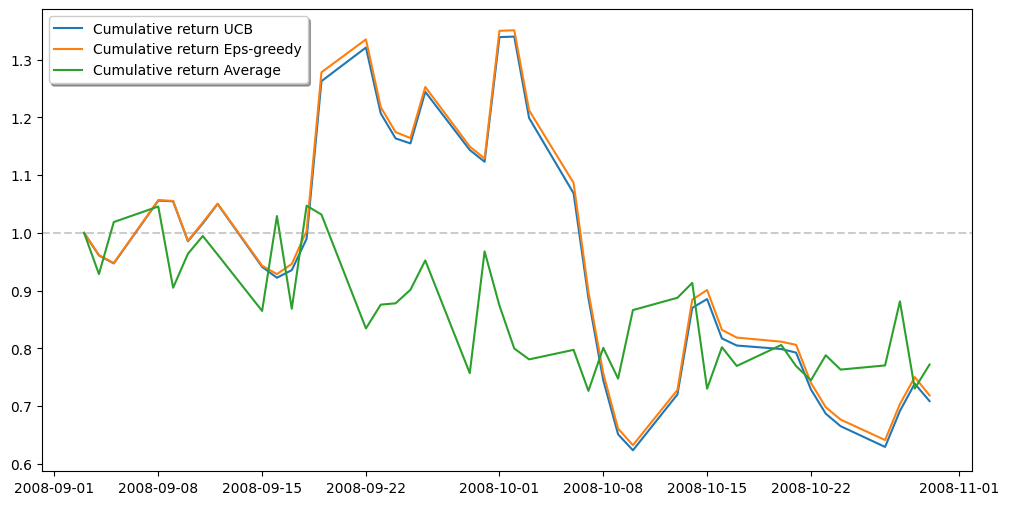

In [37]:
return_cumulative = np.zeros((TMAX + 1, 3))
return_cumulative[0, 0] = 1 # Initial value for UCB strategy
return_cumulative[0, 1] = 1 # Initial value for EG strategy
return_cumulative[0, 2] = 1 # Initial value for Average strategy

for tt in range(1, TMAX + 1):
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + ucb_reward[tt - 1])
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + eg_reward[tt - 1])

    rmean = np.mean(
        (Pdata_new[tt + HOLD - 1, :] - Pdata_new[tt - 1, :])
    )

    return_cumulative[tt, 2] = return_cumulative[tt - 1, 2] * (1 + rmean)

plt.plot(
    Pdata_new_dates[HOLD - 1 : Pdata_new.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return UCB",
)
plt.plot(
    Pdata_new_dates[HOLD - 1 : Pdata_new.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Eps-greedy",
)
plt.plot(
    Pdata_new_dates[HOLD - 1 : Pdata_new.shape[0]],
    return_cumulative[:, 2],
    label="Cumulative return Average",
)
plt.axhline(1.0, alpha=0.4, color='grey', linestyle='--')
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

## Step 10

### a. Updated Daily return data for (JPM, WFC, BAC, C, GS, USB, MS, KEY, PNC, COF, AXP, PRU, SCHW, BBW, STI) from June - July 2024. we are using the particular time frame as a proxy for latest market data.

In [38]:
# Data time frame changed

start_date = "2024-06-01"
end_date = "2024-07-31"

In [39]:
df_updated = get_daily_return(tickers, start_date, end_date) # Running the same function to get data

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += 

In [40]:
df_updated

,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,AXP,PRU,SCHW,BBW,HSBC
Date,,,,,,,,,,,,,,,
2024-06-03,200.707870,58.890114,39.638912,61.329880,454.980011,39.239384,96.541611,14.120000,153.538620,136.509720,236.176529,119.620003,72.081810,27.551598,44.880001
2024-06-04,198.062515,58.254967,39.440121,60.448364,455.299988,38.478889,95.719009,13.870000,152.696686,133.881470,236.545425,117.980003,71.703323,26.708282,44.540001
2024-06-05,196.172974,58.235119,39.718426,61.181313,461.679993,38.597412,95.798294,13.860000,153.132523,134.877014,233.993027,117.730003,74.093765,27.065451,44.150002
2024-06-06,195.824921,57.292320,39.459999,61.349693,458.100006,38.538151,95.986595,13.930000,153.499008,135.763062,232.657013,117.209999,73.954323,26.638832,44.540001
2024-06-07,198.848160,57.917545,39.779999,61.191216,454.910004,38.538151,96.274010,13.930000,154.400360,139.177795,231.979034,117.839996,73.635597,25.964180,44.430000
2024-06-10,198.510040,57.490807,39.669998,60.844555,453.549988,38.271484,95.530701,13.670000,151.240646,140.272888,231.749710,117.370003,73.814880,26.490013,44.509998
2024-06-11,193.288971,56.696873,38.860001,58.576378,444.269989,37.975189,94.579262,13.420000,148.823807,134.538528,223.863205,114.300003,73.157509,25.934416,43.320000
2024-06-12,190.474564,56.865582,39.410000,59.438084,448.700012,38.794941,94.797295,13.730000,151.191116,136.489822,223.374649,114.959999,73.267067,25.894732,43.869999
2024-06-13,192.592834,56.835808,39.259998,59.655991,446.350006,38.775185,94.361221,13.640000,150.309570,134.488754,221.530151,113.970001,73.097748,25.408585,43.209999


In [41]:
#Summary Statistics

skim(df_updated)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 40     │ │ float64     │ 15    │                                                          │
│ │ Number of columns │ 15     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ JPM            │   0 │      0 │   203.1 │    7.204 │   190.5 │  196.8 │  204.6 │  208.9 │  216.9 │ ▃▇▁▆▆▂  │  │
│ │ WFC            │   0 │      0 │   58.47 │    1.189 │   56.11 │  57.44 │  58.65 │  59.25 │  60.51 │ ▃▅▃▇▆▅  │  │
│ │ BAC            │   0 │      0 │   40.72 │    1.403 │   38.86 │   39.5 │  40.22 │   41.7 │  44.13 │ ▇▅▃▅▂▁  │  │
│ │ C              │   0 │      0 │   62.57 │    2.328 │   58.58 │  60.73 │  62.95 │  64.16 │  66.97 │ ▃▇ ▇▃▃  │  │
│ │ GS             │   0 │      0 │   469.4 │    18.55 │   444.3 │    455 │  464.2 │  486.3 │  505.7 │ ▇▇▃▃▅▃  │  │
│ │ USB            │   0 │      0 │   40.94 │      2.7 │   37.98 │  38.79 │  39.52 │  43.57 │  45.55 │ ▇▅ ▁ ▅  │  │
│ │ MS             │   0 │      0 │   99.03 │    3.554 │   94.36 │  96.02 │  98.49 │  102.5 │    106 │ ▇▃▃▃▅▂  │  │
│ │ KEY            │   0 │      0 │   14.56 │     1.01 │   13.36 │  13.66 │  14.16 │  15.57 │  16.46 │ ▇▆▁▁▃▃  │  │
│ │ PNC            │   0 │      0 │   161.4 │    11.75 │   148.8 │  151.7 │  154.8 │  175.6 │    182 │ ▇▃▁▁▁▃  │  │
│ │ COF            │   0 │      0 │   139.7 │    5.403 │   133.1 │  135.9 │  137.7 │  144.6 │  151.6 │ ▇▇▁▂▃▂  │  │
│ │ AXP            │   0 │      0 │   236.1 │    8.093 │   221.5 │    230 │  235.1 │  241.3 │  252.5 │ ▃▇▇▅▃▃  │  │
│ │ PRU            │   0 │      0 │   119.8 │    3.936 │   113.1 │  117.2 │  118.6 │  123.5 │  127.3 │ ▃▇▅▁▅▃  │  │
│ │ SCHW           │   0 │      0 │   71.01 │    4.201 │   61.83 │  66.95 │  73.01 │  73.82 │  75.78 │ ▂▃  ▇▆  │  │
│ │ BBW            │   0 │      0 │   25.68 │   0.7838 │   23.94 │  25.24 │  25.55 │   26.2 │  27.55 │ ▂▃▇▅▃▁  │  │
│ │ HSBC           │   0 │      0 │   43.63 │   0.5079 │   42.84 │  43.27 │  43.51 │  43.88 │  44.88 │ ▃▇▅▃▂▂  │  │
│ └────────────────┴─────┴────────┴─────────┴──────────┴─────────┴────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### b. Updated Daily return data for (KR, PFE, XOM, WMT, DAL, CSCO, HCP, EQIX, DUK, NFLX, GE, APA, F, REGN, CMS) from June - July 2024. we are using the particular time frame as a proxy for latest market data.

In [42]:
# Updated time frame
start_date = "2024-06-01"
end_date = "2024-07-31"

In [43]:
df2_updated = get_daily_return(tickers2, start_date, end_date) # function to get latest data

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += 

In [44]:
df2_updated

,KR,PFE,XOM,WMT,DAL,CSCO,VRSN,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
Date,,,,,,,,,,,,,,,
2024-06-03,51.860001,28.902107,114.449997,65.820000,50.613567,46.253738,174.929993,751.460022,103.410004,633.789978,161.187180,29.210072,12.003036,989.479980,62.153942
2024-06-04,52.040001,29.079603,112.669998,66.599998,49.686794,47.017197,178.789993,764.679993,104.599998,631.619995,161.107300,28.733820,11.845490,993.289978,62.392082
2024-06-05,51.680000,29.138767,113.120003,67.089996,50.643459,45.629089,180.779999,758.609985,103.199997,650.270020,162.275330,28.773508,11.884877,1005.869995,61.499065
2024-06-06,51.950001,28.399204,113.970001,67.150002,50.254814,45.837303,180.300003,762.830017,102.860001,648.520020,160.348587,29.001711,11.884877,1000.789978,60.883877
2024-06-07,51.980000,28.182266,112.750000,65.879997,50.264778,45.450619,180.460007,753.390015,102.620003,641.469971,161.646393,28.624680,11.963650,1002.950012,60.159542
2024-06-10,51.639999,27.679363,113.080002,66.959999,50.324574,45.460533,180.130005,762.530029,102.519997,644.500000,162.564835,29.239838,12.190123,1001.729980,60.030548
2024-06-11,51.369999,27.639921,112.169998,66.730003,49.118778,45.381214,181.990005,760.280029,102.360001,648.549988,160.089020,29.458120,11.924264,1010.539978,59.921402
2024-06-12,50.169998,27.275070,110.930000,66.309998,50.444153,45.232487,180.059998,761.450012,101.320000,650.059998,160.777863,29.100931,11.894724,1027.670044,59.345905
2024-06-13,50.520000,27.265209,110.040001,66.699997,49.995716,45.133335,179.699997,766.599976,101.260002,653.260010,155.426926,28.346867,11.756871,1026.550049,59.286369


In [45]:
# summary statistics
skim(df2_updated)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 40     │ │ float64     │ 15    │                                                          │
│ │ Number of columns │ 15     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ KR             │   0 │      0 │   52.01 │    1.683 │   49.37 │   50.5 │   51.9 │  53.38 │  54.86 │ ▆▅▇▃▂▆  │  │
│ │ PFE            │   0 │      0 │   28.33 │    1.148 │    26.6 │   27.4 │  27.96 │   29.1 │  31.39 │ ▇▇▃▇ ▂  │  │
│ │ XOM            │   0 │      0 │   113.8 │    2.482 │   108.4 │  112.2 │    114 │  115.1 │  118.8 │ ▂▂▇▇▂▃  │  │
│ │ WMT            │   0 │      0 │   68.57 │    1.548 │   65.82 │  67.35 │  68.26 │  69.92 │  71.03 │ ▃▇▇▃▇▆  │  │
│ │ DAL            │   0 │      0 │   47.03 │    2.628 │   42.79 │  44.82 │  46.99 │  49.42 │  50.64 │ ▇▂▅▃▅▇  │  │
│ │ CSCO           │   0 │      0 │   46.62 │   0.8967 │   45.13 │  45.83 │  46.79 │  47.15 │  48.52 │ ▆▃▅▇▂▃  │  │
│ │ VRSN           │   0 │      0 │   178.6 │    2.976 │   174.2 │  176.6 │  178.2 │  180.2 │    187 │ ▇▇▇▃▁▁  │  │
│ │ EQIX           │   0 │      0 │   770.6 │    19.15 │   741.9 │  756.8 │  764.8 │  779.1 │  812.6 │ ▅▇▅▁▂▃  │  │
│ │ DUK            │   0 │      0 │   103.4 │    3.165 │   99.35 │  100.6 │  102.6 │  106.6 │  109.9 │ ▇▅▂▁▅▂  │  │
│ │ NFLX           │   0 │      0 │   658.3 │     20.2 │   622.6 │    643 │    653 │  677.7 │  690.7 │ ▅▅▇ ▇▆  │  │
│ │ GE             │   0 │      0 │   161.9 │    3.551 │   155.4 │    160 │  161.4 │    163 │    172 │ ▂▇▇▃▁▂  │  │
│ │ APA            │   0 │      0 │    29.5 │    1.276 │    27.6 │   28.6 │  29.17 │  30.71 │  31.97 │ ▃▇▇▁▃▅  │  │
│ │ F              │   0 │      0 │   12.42 │   0.9898 │   10.67 │  11.82 │  12.04 │  13.04 │  14.33 │ ▃▇▇▆▂▆  │  │
│ │ REGN           │   0 │      0 │    1049 │    28.88 │   989.5 │   1033 │   1054 │   1070 │   1100 │ ▃▁▅▆▇▃  │  │
│ │ CMS            │   0 │      0 │    60.2 │    1.569 │   58.24 │  58.97 │  59.98 │     61 │   64.6 │  ▇▃▃▃▁  │  │
│ └────────────────┴─────┴────────┴─────────┴──────────┴─────────┴────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### c. Combining both df_updated and df2_updated dataset together and calculating daily returns

In [46]:
combined_df_updated = pd.concat([df_updated, df2_updated], axis=1) # combining both the data frames
combined_df_updated.index = pd.to_datetime(combined_df_updated.index) # formating the data time index
combined_df_updated = combined_df_updated.sort_index() # sorting the index in chronological order

In [47]:
# Computing daily returns of the data as well as dropping nan values
main_df_daily_returns_updated = combined_df_updated.pct_change().dropna()

In [48]:
main_df_daily_returns_updated

,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,...,CSCO,VRSN,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-04,-0.013180,-0.010785,-0.005015,-0.014373,0.000703,-0.019381,-0.008521,-0.017705,-0.005484,-0.019253,...,0.016506,0.022066,0.017592,0.011508,-0.003424,-0.000496,-0.016304,-0.013126,0.003851,0.003831
2024-06-05,-0.009540,-0.000341,0.007056,0.012125,0.014013,0.003080,0.000828,-0.000721,0.002854,0.007436,...,-0.029523,0.011130,-0.007938,-0.013384,0.029527,0.007250,0.001381,0.003325,0.012665,-0.014313
2024-06-06,-0.001774,-0.016190,-0.006506,0.002752,-0.007754,-0.001535,0.001966,0.005051,0.002393,0.006569,...,0.004563,-0.002655,0.005563,-0.003295,-0.002691,-0.011873,0.007931,0.000000,-0.005050,-0.010003
2024-06-07,0.015438,0.010913,0.008109,-0.002583,-0.006964,0.000000,0.002994,0.000000,0.005872,0.025152,...,-0.008436,0.000887,-0.012375,-0.002333,-0.010871,0.008094,-0.013000,0.006628,0.002158,-0.011897
2024-06-10,-0.001700,-0.007368,-0.002765,-0.005665,-0.002990,-0.006920,-0.007721,-0.018665,-0.020464,0.007868,...,0.000218,-0.001829,0.012132,-0.000975,0.004724,0.005682,0.021490,0.018930,-0.001216,-0.002144
2024-06-11,-0.026301,-0.013810,-0.020418,-0.037278,-0.020461,-0.007742,-0.009960,-0.018288,-0.015980,-0.040880,...,-0.001745,0.010326,-0.002951,-0.001561,0.006284,-0.015230,0.007465,-0.021809,0.008795,-0.001818
2024-06-12,-0.014561,0.002976,0.014153,0.014711,0.009971,0.021587,0.002305,0.023100,0.015907,0.014504,...,-0.003277,-0.010605,0.001539,-0.010160,0.002328,0.004303,-0.012125,-0.002477,0.016951,-0.009604
2024-06-13,0.011121,-0.000524,-0.003806,0.003666,-0.005237,-0.000509,-0.004600,-0.006555,-0.005831,-0.014661,...,-0.002192,-0.001999,0.006763,-0.000592,0.004923,-0.033282,-0.025912,-0.011589,-0.001090,-0.001003
2024-06-14,0.000620,0.002270,-0.000509,-0.014943,0.000246,-0.010953,0.003046,-0.020528,-0.004349,-0.010289,...,0.003515,0.003395,-0.000443,0.010863,0.024676,0.001220,-0.026251,-0.019263,0.009712,-0.001674


In [49]:
skim(main_df_daily_returns_updated) # summary statistics of daily returns of each stocks

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 39     │ │ float64     │ 30    │                                                          │
│ │ Number of columns │ 30     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃           ┃          ┃          ┃         ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25       ┃ p50      ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ JPM      │  0 │    0 │ 0.001868 │  0.01283 │ -0.03177 │ -0.005311 │ 0.000619 │  0.01257 │ 0.02493 │ ▁▂▃▇▆▅ │  │
│ │          │    │      │          │          │          │           │        6 │          │         │        │  │
│ │ WFC      │  0 │    0 │ 0.000446 │  0.01796 │ -0.06017 │   -0.0088 │ -0.00016 │  0.01102 │ 0.04348 │  ▁▃▇▅▁ │  │
│ │          │    │      │        3 │          │          │           │       88 │          │         │        │  │
│ │ BAC      │  0 │    0 │ 0.001131 │  0.01366 │ -0.02206 │ -0.005884 │ -0.00024 │ 0.007135 │ 0.05347 │ ▅▇▇▁ ▁ │  │
│ │ C        │  0 │    0 │  0.00172 │  0.01652 │ -0.04023 │ -0.008248 │ 0.003666 │  0.01206 │  0.0327 │ ▁▁▆▇▆▃ │  │
│ │ GS       │  0 │    0 │ 0.002807 │  0.01399 │  -0.0318 │ -0.006006 │ 0.001355 │  0.01341 │ 0.02646 │ ▁▃▆▇▇▅ │  │
│ │ USB      │  0 │    0 │ 0.003881 │    0.014 │ -0.01938 │ -0.007331 │ 0.004054 │  0.01073 │ 0.04551 │ ▅▆▇▃▁▁ │  │
│ │ MS       │  0 │    0 │ 0.001683 │  0.01128 │ -0.02595 │ -0.006904 │ 0.003428 │ 0.009908 │ 0.02027 │ ▁▂▃▃▇▃ │  │
│ │ KEY      │  0 │    0 │ 0.003763 │  0.01781 │  -0.0401 │ -0.007673 │ 0.004418 │  0.01675 │ 0.04332 │ ▁▅▆▇▅▂ │  │
│ │ PNC      │  0 │    0 │ 0.004456 │  0.01357 │ -0.02046 │ -0.004916 │ 0.004245 │  0.01339 │ 0.04709 │ ▂▇▇▆ ▁ │  │
│ │ COF      │  0 │    0 │ 0.002831 │  0.01721 │ -0.04088 │ -0.009798 │ 0.005583 │  0.01025 │ 0.04479 │ ▁▃▆▇▂▂ │  │
│ │ AXP      │  0 │    0 │  0.00179 │  0.01253 │ -0.03403 │ -0.003201 │ 0.001322 │ 0.009499 │ 0.02377 │ ▁▁▂▇▅▃ │  │
│ │ PRU      │  0 │    0 │ 0.001376 │  0.01019 │ -0.02616 │   -0.0046 │ 0.001712 │ 0.008605 │ 0.01841 │ ▁▃▆▇▇▆ │  │
│ │ SCHW     │  0 │    0 │ -0.00251 │  0.02305 │  -0.1018 │  -0.00723 │ -0.00190 │ 0.004765 │ 0.04301 │    ▃▇▁ │  │
│ │          │    │      │        7 │          │          │           │        8 │          │         │        │  │
│ │ BBW      │  0 │    0 │ -0.00051 │  0.01673 │ -0.03155 │  -0.01508 │ 0.003362 │ 0.008705 │ 0.03939 │ ▃▅▅▇▂▁ │  │
│ │          │    │      │       53 │          │          │           │          │          │         │        │  │
│ │ HSBC     │  0 │    0 │ -0.00073 │ 0.009401 │ -0.02674 │ -0.006548 │ -0.00068 │ 0.006318 │ 0.01423 │ ▁▁▃▇▃▅ │  │
│ │          │    │      │       96 │          │          │           │       92 │          │         │        │  │
│ │ KR       │  0 │    0 │ 0.001447 │  0.01274 │  -0.0327 │ -0.005079 │ -0.00020 │ 0.008101 │  0.0284 │ ▁▁▇▇▃▃ │  │
│ │          │    │      │          │          │        

### Clustering New Data

In [50]:
# Upated Data correlation matrix

main_df_daily_returns_updated.corr()

,JPM,WFC,BAC,C,GS,USB,MS,KEY,PNC,COF,...,CSCO,VRSN,EQIX,DUK,NFLX,GE,APA,F,REGN,CMS
JPM,1.000000,0.714975,0.611347,0.734289,0.659840,0.421704,0.613982,0.591770,0.548840,0.573153,...,0.133790,-0.047929,-0.013091,0.138598,-0.092334,0.087011,0.328820,0.139663,-0.168403,0.110253
WFC,0.714975,1.000000,0.702418,0.653313,0.607950,0.429332,0.534136,0.616505,0.664687,0.604258,...,-0.057662,-0.110504,0.035157,0.025260,-0.059768,0.206175,0.286352,0.005788,-0.135400,0.119258
BAC,0.611347,0.702418,1.000000,0.750213,0.639287,0.493428,0.495143,0.637811,0.768045,0.585083,...,-0.084757,-0.052607,0.187433,0.161515,-0.062095,0.211080,0.200042,0.280770,0.094401,0.140204
C,0.734289,0.653313,0.750213,1.000000,0.725224,0.513127,0.617309,0.687995,0.662163,0.558969,...,-0.102208,-0.107024,-0.075159,-0.069615,-0.009491,0.198869,0.234938,0.002792,0.058391,0.013082
GS,0.659840,0.607950,0.639287,0.725224,1.000000,0.397986,0.749636,0.631639,0.618351,0.598898,...,-0.068878,0.026114,0.021294,0.064416,-0.043161,0.226916,0.355091,0.063882,0.198064,0.103513
USB,0.421704,0.429332,0.493428,0.513127,0.397986,1.000000,0.414503,0.783628,0.763786,0.368491,...,0.153874,-0.035943,0.084837,0.232272,-0.350537,0.055131,0.388165,0.123451,0.153131,0.338219
MS,0.613982,0.534136,0.495143,0.617309,0.749636,0.414503,1.000000,0.613142,0.608268,0.503306,...,0.035290,-0.186692,0.014070,-0.094765,-0.068027,0.260900,0.358582,0.009943,0.154089,-0.028948
KEY,0.591770,0.616505,0.637811,0.687995,0.631639,0.783628,0.613142,1.000000,0.869523,0.604363,...,0.161425,0.010466,0.130908,0.166893,-0.341943,0.116252,0.480471,0.081519,0.212950,0.267209
PNC,0.548840,0.664687,0.768045,0.662163,0.618351,0.763786,0.608268,0.869523,1.000000,0.616455,...,0.044078,0.035612,0.223047,0.215613,-0.219459,0.214487,0.307670,0.063622,0.190598,0.312491
COF,0.573153,0.604258,0.585083,0.558969,0.598898,0.368491,0.503306,0.604363,0.616455,1.000000,...,-0.064837,-0.082163,-0.069048,-0.086259,-0.211194,0.180021,0.430642,0.122264,-0.002039,0.076172


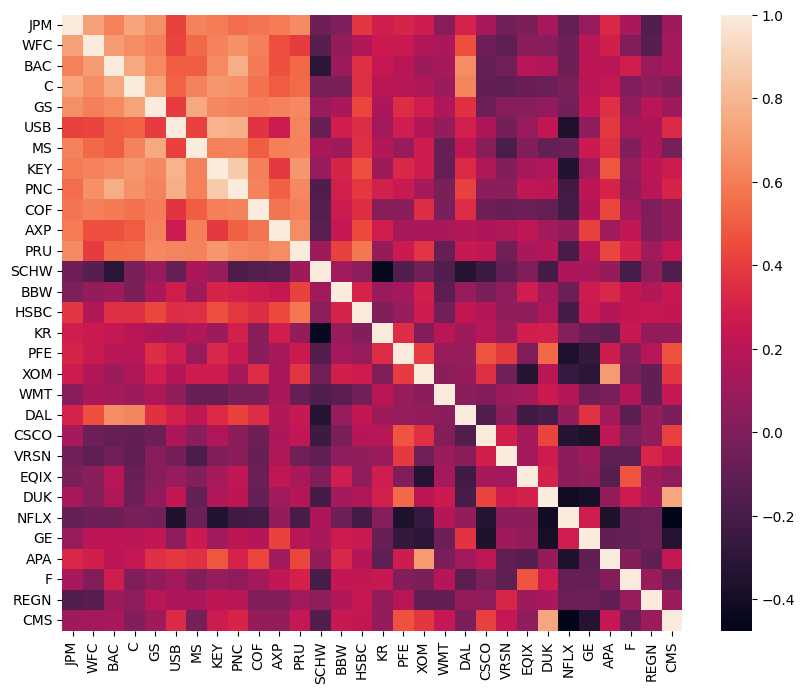

In [51]:
# Upated Data correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(main_df_daily_returns_updated.corr())
plt.show()

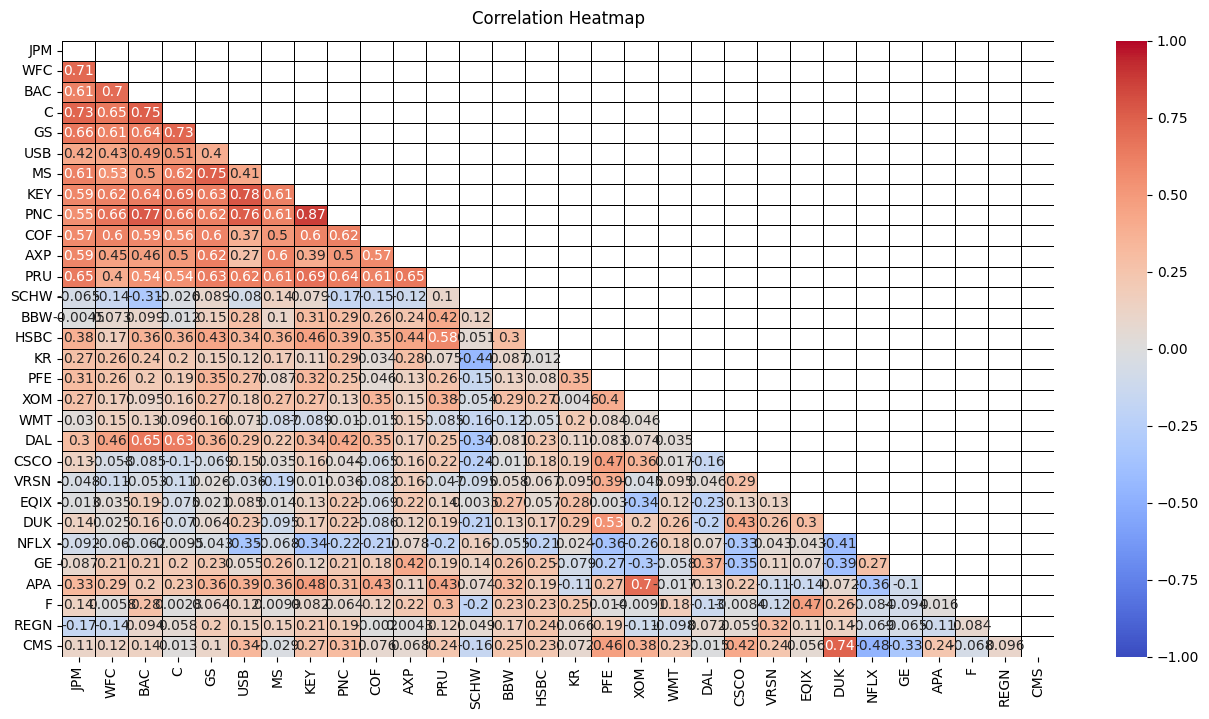

In [52]:
# Upated Data correlation heatmap
plt.figure(figsize=(16, 8))
mask = np.triu(np.ones_like(main_df_daily_returns_updated.corr()))
heatmap = sns.heatmap(main_df_daily_returns_updated.corr(), mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<Figure size 1000x1600 with 0 Axes>

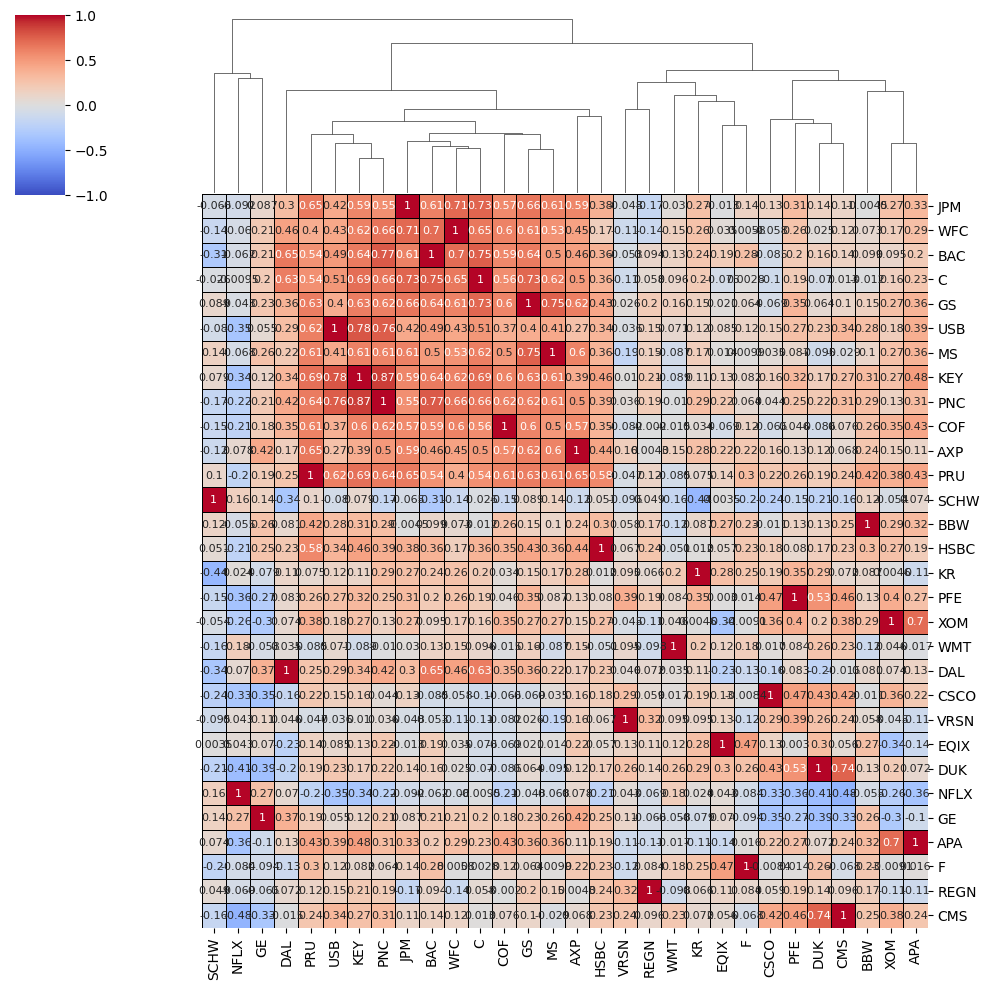

In [53]:
# Upated Data correlation cluter analysis
plt.figure(figsize=(10, 16))
mask = np.triu(np.ones_like(main_df_daily_returns_updated.corr()))
cluster = sns.clustermap(main_df_daily_returns_updated.corr(), row_cluster=False, annot=True,annot_kws={'size': 8}, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

In [54]:
# Performing hierarchical clustering
Z = linkage(main_df_daily_returns_updated.corr(), method='ward')

# Setting the number of clusters or use a threshold to form flat clusters
max_d = 1
clusters = fcluster(Z, max_d, criterion='distance')

# Creating a DataFrame to store stock symbols and their respective cluster
clustered_stocks = pd.DataFrame({'Stock': main_df_daily_returns_updated.corr().index, 'Cluster': clusters})

# Sorting the DataFrame by cluster
clustered_stocks = clustered_stocks.sort_values(by='Cluster').reset_index(drop=True)
print(clustered_stocks)


   Stock  Cluster
0    USB        1
1    KEY        1
2    PNC        1
3    PRU        1
4    JPM        2
5    WFC        2
6    BAC        2
7      C        2
8     GS        3
9     MS        3
10   COF        3
11   AXP        4
12   DUK        5
13   CMS        5
14   PFE        6
15  CSCO        7
16   XOM        8
17   APA        8
18   BBW        9
19  HSBC       10
20  VRSN       11
21  REGN       12
22  EQIX       13
23     F       14
24    KR       15
25   WMT       16
26   DAL       17
27    GE       18
28  SCHW       19
29  NFLX       20


In [55]:
# Grouping stocks by their cluster
grouped_stocks = clustered_stocks.groupby('Cluster')

# Printing stocks in each cluster
for cluster, stocks in grouped_stocks:
    print(f'Cluster {cluster}: {stocks["Stock"].tolist()}')

# filtering stocks by a specific cluster
cluster_3_stocks = clustered_stocks[clustered_stocks['Cluster'] == 1]['Stock'].tolist()
print(f'Stocks in Cluster 1: {cluster_1_stocks}')


Cluster 1: ['USB', 'KEY', 'PNC', 'PRU']
Cluster 2: ['JPM', 'WFC', 'BAC', 'C']
Cluster 3: ['GS', 'MS', 'COF']
Cluster 4: ['AXP']
Cluster 5: ['DUK', 'CMS']
Cluster 6: ['PFE']
Cluster 7: ['CSCO']
Cluster 8: ['XOM', 'APA']
Cluster 9: ['BBW']
Cluster 10: ['HSBC']
Cluster 11: ['VRSN']
Cluster 12: ['REGN']
Cluster 13: ['EQIX']
Cluster 14: ['F']
Cluster 15: ['KR']
Cluster 16: ['WMT']
Cluster 17: ['DAL']
Cluster 18: ['GE']
Cluster 19: ['SCHW']
Cluster 20: ['NFLX']
Stocks in Cluster 1: ['WFC', 'BAC', 'C', 'USB', 'COF']


In [56]:
stock_returns = pd.DataFrame(main_df_daily_returns_updated, index=main_df_daily_returns_updated.index, columns=tickers)

# Stocks in Cluster 3
cluster_1_stocks = ['USB', 'KEY', 'PNC', 'PRU']

# Extracting data for Cluster 3 stocks
cluster_1_data = stock_returns[cluster_1_stocks]

# Displaying the data
print(cluster_1_data)

                 USB       KEY       PNC       PRU
Date                                              
2024-06-04 -0.019381 -0.017705 -0.005484 -0.013710
2024-06-05  0.003080 -0.000721  0.002854 -0.002119
2024-06-06 -0.001535  0.005051  0.002393 -0.004417
2024-06-07  0.000000  0.000000  0.005872  0.005375
2024-06-10 -0.006920 -0.018665 -0.020464 -0.003988
2024-06-11 -0.007742 -0.018288 -0.015980 -0.026157
2024-06-12  0.021587  0.023100  0.015907  0.005774
2024-06-13 -0.000509 -0.006555 -0.005831 -0.008612
2024-06-14 -0.010953 -0.020528 -0.004349 -0.007546
2024-06-17  0.006696  0.014970  0.011185  0.012377
2024-06-18  0.005116  0.001475  0.011127  0.010130
2024-06-20 -0.000255  0.004418 -0.008415  0.011844
2024-06-21  0.010692 -0.002933  0.000131  0.005895
2024-06-24  0.021410  0.023529  0.011097  0.012146
2024-06-25 -0.013070 -0.019397 -0.019367 -0.004784
2024-06-26 -0.007746 -0.008791 -0.000592 -0.008179
2024-06-27 -0.000755  0.006652  0.000790 -0.002466
2024-06-28  0.013013  0.043319 

In [57]:
# Converting the data and data index to numpy format
Pdata_new = cluster_1_data.to_numpy()
Pdata_new_dates= cluster_1_data.index.to_numpy()

## Step 11

In [58]:
# Function to choose an action based on Q-values and epsilon-greedy strategy

def optimal_action(qvalue, eps):

  nactions = qvalue.shape[0]

  # Explore with probability eps
  if np.random.rand() <= eps:

    return np.random.choice(nactions)

  else:
    # Exploit: choose action with highest Q-value
    max_value = np.max(qvalue)
    best_actions = np.where(qvalue == max_value)[0]
    return np.random.choice(best_actions)


In [59]:
# Function to update Q-values based on the observed reward
def reward_update(action, reward, qvalue_old, alpha):

  qvalue_new = qvalue_old.copy()
  # Update Q-value for the chosen action using the learning rate alpha
  qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

  return qvalue_new

In [60]:
# Main function to run the bandit algorithm

def run_bandit_algorithm(Pdata_new, NK, EPSILON, ALPHA, NEPISODES, HOLD, UCB_WEIGHT):
    TMAX = Pdata_new.shape[0] - HOLD
    seed(1234)
    reward_avg = np.zeros((TMAX))
    optimal_avg = np.zeros((TMAX))
    reward_queue = np.zeros((HOLD, 2))

    epsilon = 1e-10 # Small value to avoid division by zero

    for run in range(NEPISODES):
         # Initialize Q-values, upper confidence bound Q-values, and action counts
        qvalue = np.zeros((NK))
        qvalue_up = np.zeros((NK))
        nactions = np.zeros((NK))

        for tt in range(TMAX):
          # Choose action based on upper confidence bound Q-values
            aa_opt = optimal_action(qvalue_up, EPSILON)

            # Compute reward as return over holding period
            denominator = Pdata_new[tt, aa_opt].copy()
            if denominator == 0:
                denominator = epsilon

            reward_queue[HOLD - 1, 0] = (Pdata_new[tt + HOLD, aa_opt] - Pdata_new[tt, aa_opt]) / denominator

            reward_queue[HOLD - 1, 1] = aa_opt

            # Update Q function using action chosen HOLD days before
            qvalue = reward_update(int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA)

            # Update upper confidence bound Q-values
            qvalue_up = np.zeros((NK))
            for aa in range(NK):
                if nactions[aa] == 0:
                    qvalue_up[aa] = np.max(qvalue) + 1.0
                else:
                    qvalue_up[aa] = qvalue[aa] + np.sqrt(np.log(tt + 1) / nactions[aa])

            # Shift reward queue
            reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]

            # Update average reward and optimal action frequency
            reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES

            optimal_avg[tt] += (
                aa_opt == np.argmax((Pdata_new[tt + HOLD, :] - Pdata_new[tt, :]) / np.where(Pdata_new[tt, :] == 0, epsilon, Pdata_new[tt, :]))
            ) / NEPISODES

    return reward_avg, optimal_avg

In [61]:
# Set parameters for the algorithm
NK = Pdata_new.shape[1] # Number of actions (presumably number of stocks or assets)
EPSILON = 0.25 # Exploration rate
ALPHA = 0.7  # Learning rate
NEPISODES = 1000 # Number of episodes to run
HOLD = 5 # Holding period
UCB_WEIGHT = 1.0 # Weight for upper confidence bound (not used in the current implementation)
TMAX = Pdata_new.shape[0] - HOLD # Maximum time steps

# Run the bandit algorithm
reward_avg, optimal_avg = run_bandit_algorithm(Pdata_new, NK, EPSILON, ALPHA, NEPISODES, HOLD, UCB_WEIGHT)

# Print results
print("Average reward: ", reward_avg)
print("Average optimal action: ", optimal_avg)



Average reward:  [ 5.56487346e-01 -6.65933381e+00 -1.34668504e+00 -8.02475814e+07
 -2.36322936e+00 -1.44867051e+00 -6.29952684e-01 -6.24233340e+00
 -2.81860561e+00 -2.34272905e+00 -3.07435623e+00  4.72440385e-02
  3.95515397e+01 -9.91006014e-01 -2.21365073e+00  2.33084873e+00
  8.36243634e-01 -1.04360656e+00  7.53041194e+00  4.34475624e-01
  4.19851669e+07 -1.31540434e+00  3.03070828e+00  7.75978217e-01
 -2.61777464e-02 -1.93582185e+00 -1.35707299e+00 -3.02828038e-01
 -8.27008984e-01 -1.60742317e+00 -1.35221429e+00  1.19416315e+00
 -1.39446961e+00 -2.94320782e+00]
Average optimal action:  [0.253 0.234 0.245 0.246 0.265 0.26  0.225 0.256 0.252 0.256 0.247 0.251
 0.245 0.234 0.259 0.236 0.256 0.227 0.241 0.243 0.254 0.249 0.27  0.249
 0.273 0.26  0.248 0.245 0.249 0.267 0.276 0.251 0.231 0.23 ]


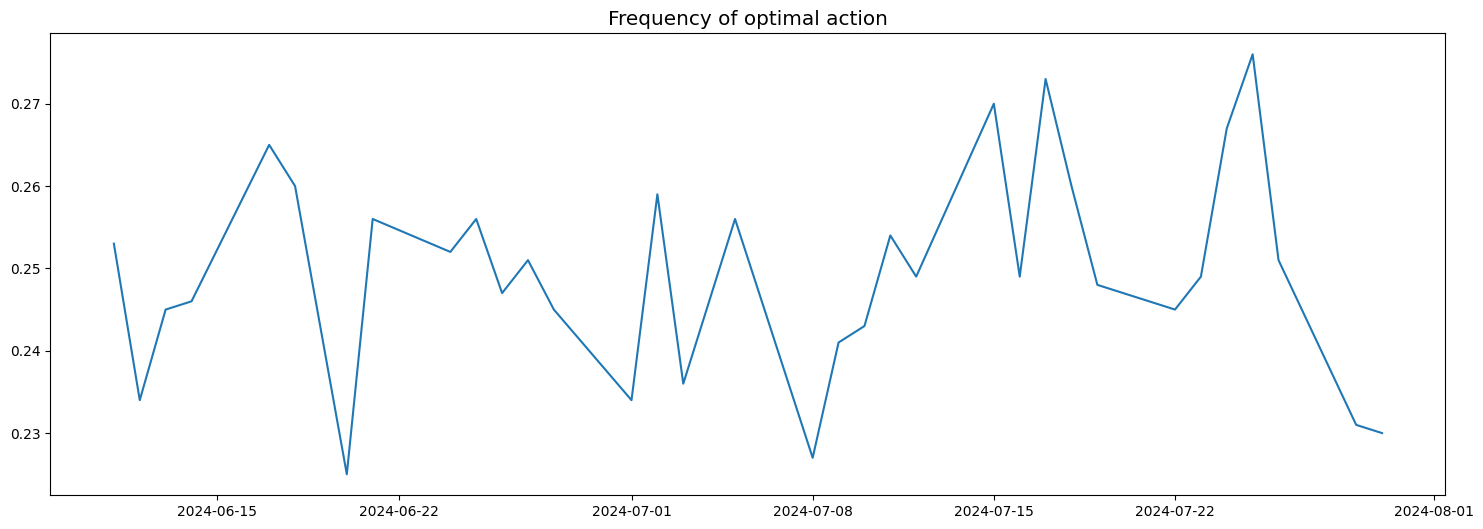

In [62]:
# Plot the frequency of optimal action

plt.plot(Pdata_new_dates[HOLD : Pdata_new.shape[0]], optimal_avg)
plt.title("Frequency of optimal action", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.show()

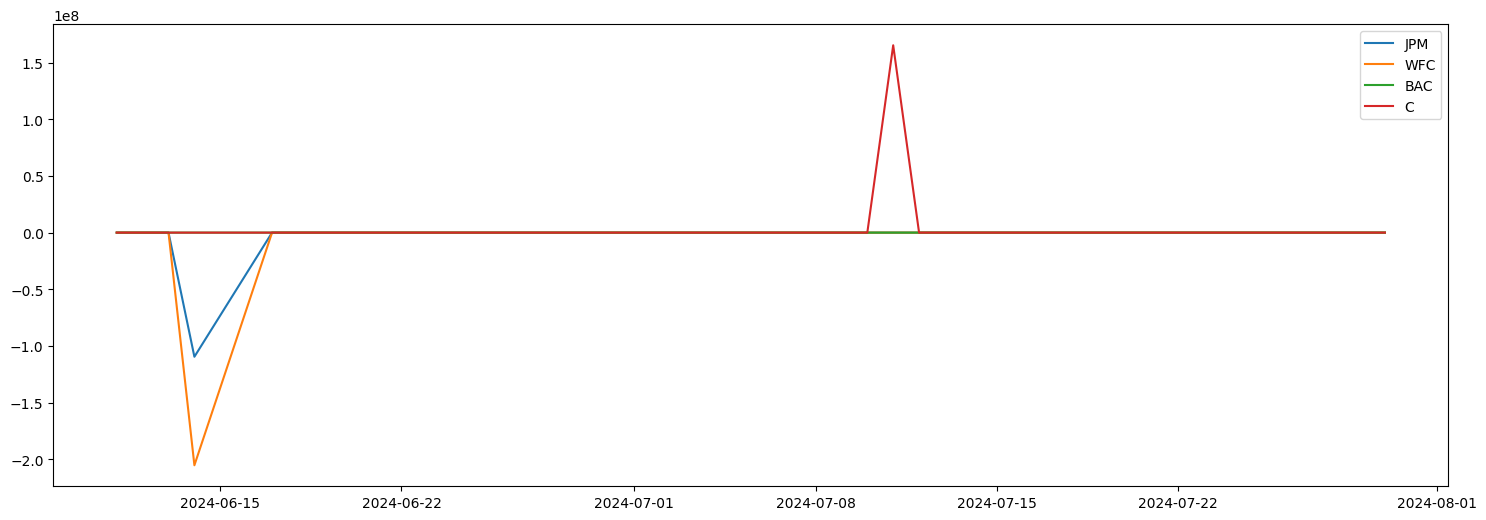

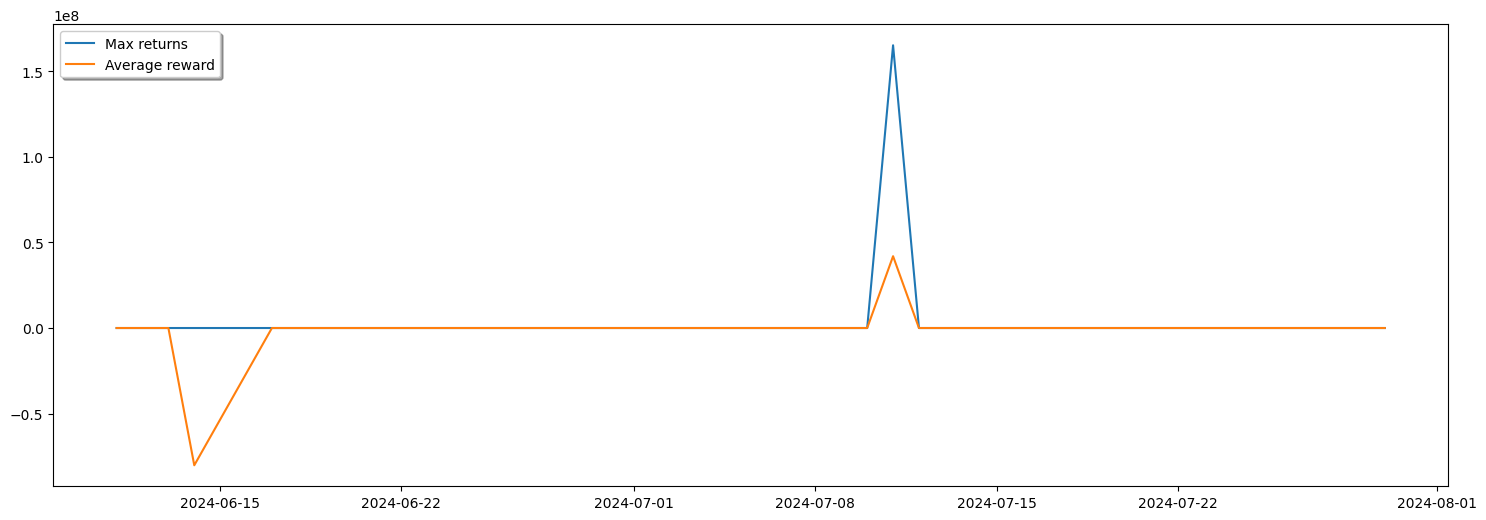

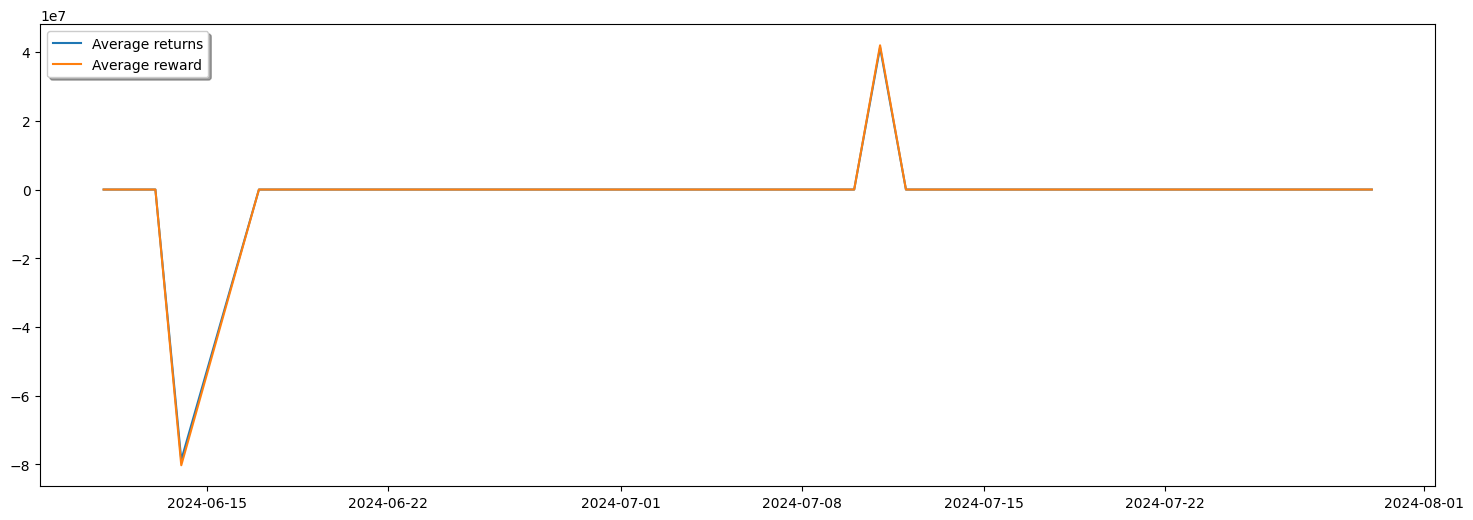

0.24950000000000017
1.138461051242447e+302 107515015.80231111
3.669835949545863e+302 109540278.6595252


In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define a small epsilon value to handle division by zero
epsilon = 1e-10

# Replace zeros in the denominator with epsilon
denominator = np.where(Pdata_new[0:TMAX, :] == 0, epsilon, Pdata_new[0:TMAX, :])

# Plot the returns for all stocks
plt.plot(
    Pdata_new_dates[HOLD:Pdata_new.shape[0]],
    (Pdata_new[HOLD:Pdata_new.shape[0], :] - Pdata_new[0:TMAX, :]) / denominator,
)
plt.legend(tickers)
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.show()

# Plot the max returns and average reward
plt.plot(
    Pdata_new_dates[HOLD:Pdata_new.shape[0]],
    np.max(
        (Pdata_new[HOLD:Pdata_new.shape[0], :] - Pdata_new[0:TMAX, :]) / denominator, axis=1
    ),
    label="Max returns",
)
plt.plot(
    Pdata_new_dates[HOLD:Pdata_new.shape[0]], reward_avg, label="Average reward"
)
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.show()

# Plot the average returns and average reward
plt.plot(
    Pdata_new_dates[HOLD:Pdata_new.shape[0]],
    np.mean(
        (Pdata_new[HOLD:Pdata_new.shape[0], :] - Pdata_new[0:TMAX, :]) / denominator, axis=1
    ),
    label="Average returns",
)
plt.plot(
    Pdata_new_dates[HOLD:Pdata_new.shape[0]], reward_avg, label="Average reward"
)
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 6)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))

# Average annualized return from holding the equally-weighted portfolio
annualized_return_portfolio = (
    1
    + np.mean(
        (Pdata_new[HOLD:Pdata_new.shape[0], :] - Pdata_new[0:TMAX, :]) / denominator
    )
) ** (250 / HOLD) - 1
print(
    annualized_return_portfolio,
    np.sqrt(250 / HOLD)
    * np.std(
        np.mean(
            (Pdata_new[HOLD:Pdata_new.shape[0], :] - Pdata_new[0:TMAX, :]) / denominator,
            axis=1,
        )
    ),
)

# Average annualized return from holding the Bandit portfolio
annualized_return_bandit = (1 + np.mean(reward_avg)) ** (250 / HOLD) - 1
print(
    annualized_return_bandit,
    np.sqrt(250 / HOLD) * np.std(reward_avg),
)


UCB & Epsilon greedy

[I 2024-08-13 22:33:53,752] A new study created in memory with name: no-name-2546f5ef-47b8-466f-8dbe-693f5dfc962e
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5760\2174383031.py:42: RuntimeWarning: divide by zero encountered in divide
  aa_opt == np.argmax((np.prod(1 + Pdata_new[tt: tt + HOLD + 1, :]) - 1) / np.where(Pdata_new[tt, :] == 0, EPSILON, Pdata_new[tt, :]))
[I 2024-08-13 22:33:57,838] Trial 0 finished with value: 2.2899206490199133 and parameters: {'ucb_weight': 0.20839255812473112, 'alpha': 0.683406588021622, 'hold': 8}. Best is trial 0 with value: 2.2899206490199133.
[I 2024-08-13 22:34:01,733] Trial 1 finished with value: 3.478956024148917 and parameters: {'ucb_weight': 0.5492654309339964, 'alpha': 0.3623060066852488, 'hold': 10}. Best is trial 1 with value: 3.478956024148917.
[I 2024-08-13 22:34:05,741] Trial 2 finished with value: 1.218743723157858 and parameters: {'ucb_weight': 1.791505299413877, 'alpha': 0.7017675408661022, 'hold': 5}. Best is trial 1 with value: 3.478

Best UCB parameters: {'ucb_weight': 0.5492654309339964, 'alpha': 0.3623060066852488, 'hold': 10}
Best Epsilon-greedy parameters: {'epsilon': 0.11593368214319254, 'alpha': 0.14244376341683074, 'hold': 10}


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5760\2083065649.py:43: RuntimeWarning: divide by zero encountered in divide
  avg_portfolio_returns = np.mean(Pdata_new[study_ucb.best_params['hold']:] / Pdata_new[:-study_ucb.best_params['hold']] - 1, axis=1)


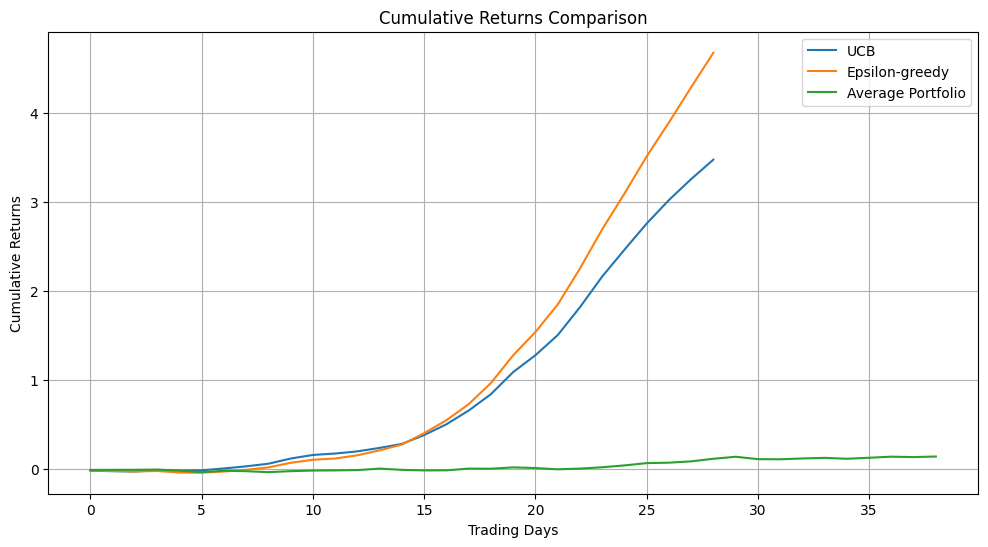


Final Portfolio Values:
UCB: 4.4790
Epsilon-greedy: 5.6826
Average Portfolio: 1.1368

Sharpe Ratios:
UCB: 19.3442
Epsilon-greedy: 18.6178
Average Portfolio: nan

Maximum Drawdowns:
UCB: 0.0090
Epsilon-greedy: 0.0250
Average Portfolio: nan


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:152: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5760\2083065649.py:87: RuntimeWarning: invalid value encountered in subtract
  drawdown = (running_max - cum_returns) / running_max
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5760\2083065649.py:87: RuntimeWarning: invalid value encountered in divide
  drawdown = (running_max - cum_returns) / running_max


In [64]:
NK = Pdata_new.shape[1]
NEPISODES = 500
n_trials = 300

def calculate_cumulative_returns(rewards):
    return np.cumprod(1 + np.array(rewards)) - 1

def objective_ucb(trial):
    ucb_weight = trial.suggest_float('ucb_weight', 0.1, 2.0, log=True)
    alpha = trial.suggest_float('alpha', 0.1, 0.9)
    hold = trial.suggest_int('hold', 1, 10)

    ucb_reward, _ = run_ucb_bandit_algorithm(Pdata_new, NK, EPSILON=0, ALPHA=alpha, NEPISODES=NEPISODES, HOLD=hold, UCB_WEIGHT=ucb_weight)
    final_return = calculate_cumulative_returns(ucb_reward)[-1]
    return final_return

def objective_eg(trial):
    epsilon = trial.suggest_float('epsilon', 0.1, 0.9)
    alpha = trial.suggest_float('alpha', 0.1, 0.9)
    hold = trial.suggest_int('hold', 1, 10)

    eg_reward, _ = run_eg_bandit_algorithm(Pdata_new, NK, epsilon, alpha, NEPISODES=NEPISODES, HOLD=hold)
    final_return = calculate_cumulative_returns(eg_reward)[-1]
    return final_return

study_ucb = optuna.create_study(direction='maximize')
study_ucb.optimize(objective_ucb, n_trials=n_trials)

study_eg = optuna.create_study(direction='maximize')
study_eg.optimize(objective_eg, n_trials=n_trials)

print("Best UCB parameters:", study_ucb.best_params)
print("Best Epsilon-greedy parameters:", study_eg.best_params)

ucb_reward, _ = run_ucb_bandit_algorithm(Pdata_new, NK, EPSILON=0, ALPHA=study_ucb.best_params['alpha'],
                                         NEPISODES=NEPISODES, HOLD=study_ucb.best_params['hold'],
                                         UCB_WEIGHT=study_ucb.best_params['ucb_weight'])

eg_reward, _ = run_eg_bandit_algorithm(Pdata_new, NK, study_eg.best_params['epsilon'],
                                       study_eg.best_params['alpha'], NEPISODES=NEPISODES,
                                       HOLD=study_eg.best_params['hold'])

avg_portfolio_returns = np.mean(Pdata_new[study_ucb.best_params['hold']:] / Pdata_new[:-study_ucb.best_params['hold']] - 1, axis=1)

ucb_cumulative_returns = calculate_cumulative_returns(ucb_reward)
eg_cumulative_returns = calculate_cumulative_returns(eg_reward)
avg_cumulative_returns = calculate_cumulative_returns(Pdata_new.mean(axis=1))

plt.figure(figsize=(12, 6))
plt.plot(ucb_cumulative_returns, label='UCB')
plt.plot(eg_cumulative_returns, label='Epsilon-greedy')
plt.plot(avg_cumulative_returns, label='Average Portfolio')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Performance metrics
final_portfolio_values = {
    'UCB': ucb_cumulative_returns[-1] + 1,
    'Epsilon-greedy': eg_cumulative_returns[-1] + 1,
    'Average Portfolio': avg_cumulative_returns[-1] + 1
}

print("\nFinal Portfolio Values:")
for method, value in final_portfolio_values.items():
    print(f"{method}: {value:.4f}")

def sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns) * np.sqrt(252)  # Annualized

sharpe_ratios = {
    'UCB': sharpe_ratio(ucb_reward),
    'Epsilon-greedy': sharpe_ratio(eg_reward),
    'Average Portfolio': sharpe_ratio(avg_portfolio_returns)
}

print("\nSharpe Ratios:")
for method, ratio in sharpe_ratios.items():
    print(f"{method}: {ratio:.4f}")

def max_drawdown(returns):
    cum_returns = np.cumprod(1 + np.array(returns))
    running_max = np.maximum.accumulate(cum_returns)
    drawdown = (running_max - cum_returns) / running_max
    return np.max(drawdown)

max_drawdowns = {
    'UCB': max_drawdown(ucb_reward),
    'Epsilon-greedy': max_drawdown(eg_reward),
    'Average Portfolio': max_drawdown(avg_portfolio_returns)
}

print("\nMaximum Drawdowns:")
for method, drawdown in max_drawdowns.items():
    print(f"{method}: {drawdown:.4f}")